# AMEO 2015 Dataset


The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. 

The dataset includes standardized scores from three different areas, including cognitive skills, technical skills, and personality skills, as well as the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations). Demographic features are also included in the dataset.

There are about 4000 data points and 40 independent variables in the dataset. The independent variables are both continuous and categorical in nature.

In [1]:
from IPython.display import Javascript
def resize_colab_cell():
  display(Javascript('google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'))
get_ipython().events.register('pre_run_cell', resize_colab_cell)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', None)

doc_html = 'AMEO_2015_Data_Description.html'
tabs = pd.read_html(doc_html)
descr_df = pd.concat(tabs)
headers = descr_df.iloc[0]
descr_df  = pd.DataFrame(descr_df.values[1:], columns=headers)

<IPython.core.display.Javascript object>

In [3]:
data_xls = 'aspiring_minds_employability_outcomes_2015.xlsx'
ameo = pd.read_excel(data_xls)
ameo.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
ameo.drop('Unnamed: 0', axis=1, inplace=True)
ameo.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

The dataset contains 3998 observations and 38 features. At first inspection, there are no missing values.

In [5]:
date_cols = descr_df[descr_df['TYPE'] == 'Date']['VARIABLES'].tolist()
descr_df[descr_df['TYPE'] == 'Date']

<IPython.core.display.Javascript object>

,VARIABLES,TYPE,Description
2,DOJ,Date,Date of joining the company
3,DOL,Date,Date of leaving the company
7,DOB,Date,Date of birth of candidate
10,12graduation,Date,Year of graduation - senior year high school
12,12board,Date,The school board whose curriculum the candidat...
21,GraduationYear,Date,Year of graduation (Bachelor’s degree)


There is a mistake in dataset description table. The "12board" column should have the "Categorical" type rather than the "Date" type. Also, the type of the "10board" variable should be changed to "Categorical".

In [6]:
descr_df.loc[12, 'TYPE'] = 'Categorical'
descr_df.loc[9, 'TYPE'] = 'Categorical'

<IPython.core.display.Javascript object>

**Dataset describtion**

|VARIABLES|TYPE|Description|
|---|---|---|
|ID|UID|A unique ID to identify a candidate|
|Salary|Continuous|Annual CTC oﬀered to the candidate \(in INR\)|
|DOJ|Date|Date of joining the company|
|DOL|Date|Date of leaving the company|
|Designation|Categorical|Designation oﬀered in the job|
|JobCity|Categorical|Location of the job \(city\)|
|Gender|Categorical|Candidate’s gender|
|DOB|Date|Date of birth of candidate|
|10percentage|Continuous|Overall marks obtained in grade 10examinations|
|10board|Categorical|The school board whose curriculum the candidate followed in grade 10|
|12graduation|Date|Year of graduation - senior year high school|
|12percentage|Continuous|Overall marks obtained in grade 12examinations|
|12board|Categorical|The school board whose curriculum the candidate followed in grade 12|
|CollegeID|NA/ID|Unique ID identifying the college which the candidate attended|
|CollegeTier|Categorical|Tier of college|
|Degree|Categorical|Degree obtained/pursued by the candidate|
|Specialization|Categorical|Specialization pursued by the candidate|
|CollegeGPA|Continuous|Aggregate GPA at graduation|
|CollegeCityID|NA/ID|A unique ID to identify the city in which the college is located in|
|CollegeCityTier|Categorical|The tier of the city in which the college is located|
|CollegeState|Categorical|Name of States|
|GraduationYear|Date|Year of graduation \(Bachelor’s degree\)|
|English|Continuous|Scores in AMCAT English section|
|Logical|Continuous|Scores in AMCAT Logical section|
|Quant|Continuous|Scores in AMCAT Quantitative section|
|Domain|Continuous/ Standardized|Scores in AMCAT’s domain module|
|ComputerProgramming|Continuous|Score in AMCAT’s Computer programmingsection|
|ElectronicsAndSemicon|Continuous|Score in AMCAT’s Electronics & Semiconductor Engineering section|
|ComputerScience|Continuous|Score in AMCAT’s Computer Science section|
|MechanicalEngg|Continuous|Score in AMCAT’s Mechanical Engineeringsection|
|ElectricalEngg|Continuous|Score in AMCAT’s Electrical Engineering section|
|TelecomEngg|Continuous|Score in AMCAT’s Telecommunication Engineering section|
|CivilEngg|Continuous|Score in AMCAT’s Civil Engineering section|
|conscientiousness|Continuous/ Standardized|Scores in one of the sections of AMCAT’s personality test|
|agreeableness|Continuous/Standardized|Scores in one of the sections of AMCAT’spersonality test|
|extraversion|Continuous/ Standardized|Scores in one of the sections of AMCAT’s personality test|
|neuroticism|Continuous/Standardized|Scores in one of the sections of AMCAT’spersonality test|
|openess\_to\_experience|Continuous/ Standardized|Scores in one of the sections of AMCAT’s personality test|

In [7]:
ameo[date_cols].head()

<IPython.core.display.Javascript object>

,DOJ,DOL,DOB,12graduation,12board,GraduationYear
0,2012-06-01,present,1990-02-19,2007,"board of intermediate education,ap",2011
1,2013-09-01,present,1989-10-04,2007,cbse,2012
2,2014-06-01,present,1992-08-03,2010,cbse,2014
3,2011-07-01,present,1989-12-05,2007,cbse,2011
4,2014-03-01,2015-03-01 00:00:00,1991-02-27,2008,cbse,2012


The date when the employee left the company is listed in the "DOL" column. The "present" value denotes that, at the time of this study, a graduate was still employed by the company. This value should be changed to a date (for example, the end of the year the study was conducted in) to enable conversion of the data type of this column to datetime.

In [8]:
ameo['DOL'] = ameo['DOL'].replace('present', '2015-01-31 00:00:00')
ameo['DOL'] = pd.to_datetime(ameo['DOL'])

<IPython.core.display.Javascript object>

In [9]:
ameo.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   datetime64[ns]
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [10]:
ameo.describe()

<IPython.core.display.Javascript object>

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


It is best to remove columns with ID values because they are unsuitable for analysis.

In [11]:
ameo.drop(['ID', 'CollegeID', 'CollegeCityID'], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [12]:
ameo.describe(include='object')

<IPython.core.display.Javascript object>

,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
count,3998,3998,3998,3998,3998,3998,3998,3998
unique,419,339,2,275,340,4,46,26
top,software engineer,Bangalore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,539,627,3041,1395,1400,3700,880,915


There are several categorical columns with more than 10 categories, which makes them challenging to analyze. These columns require feature engineering.

# Feature Engineering

## "JobCity" feature

In [13]:
print(ameo['JobCity'].nunique())
ameo['JobCity'].sample(100).unique()

<IPython.core.display.Javascript object>

339


array(['Hyderabad', 'Gurgaon', -1, 'PUNE', 'Jagdalpur', 'Kolkata',
       'Chennai', 'Greater Noida', 'New Delhi', 'Chandigarh', 'Banglore',
       'Hyderabad ', 'Bangalore', 'Bangalore ', 'Pune', 'chennai',
       'Mysore', 'Noida', 'Pilani', 'Kochi/Cochin', 'Bulandshahar',
       'Bhopal', 'Thiruvananthapuram', 'Mumbai', 'Indore', 'Raipur',
       'Bhubaneshwar', 'Bhubaneswar', 'Faridabad', 'Jodhpur', 'Jaipur'],
      dtype=object)

There are 339 unique values in the "JobCity" columns. Some city names are misspelled, and some values are not even strings. The values of that column can be compared to a list of Indian cities from the Wikipedia table to determine the correct name.

In [14]:
import requests
from bs4 import BeautifulSoup

wikiurl="https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population"
response=requests.get(wikiurl)
soup = BeautifulSoup(response.text, 'html.parser')
ind_table = soup.find('table',{'class':"wikitable"})
ind_cities = pd.read_html(str(ind_table))
ind_cities = pd.DataFrame(ind_cities[0])
ind_cities.head()

<IPython.core.display.Javascript object>

,Rank,City,Population (2011)[3],Population (2001),State or union territory
0,1,Mumbai,12442373,11978450,Maharashtra
1,2,Delhi,11007835,9879172,Delhi
2,3,Bangalore,8425970,4301326,Karnataka
3,4,Hyderabad,6809970,3637483,Telangana
4,5,Ahmedabad,5570585,3520085,Gujarat


In [15]:
from difflib import get_close_matches
import re

def clean_feature(val, val_list):
  if type(val) == str:
    try:
      return get_close_matches(val.title(), val_list)[0]
    except:
      try:
        for word in re.split('\W+', val):
          return get_close_matches(word.title(), val_list)[0]
      except:
        return val.strip().title()
  else:
    return np.nan

city_list = ind_cities['City'].tolist()
ameo['JobCity_cleaned'] = ameo['JobCity'].apply(lambda x: clean_feature(x, city_list))
ameo[['JobCity_cleaned', 'JobCity']].sample(20)

<IPython.core.display.Javascript object>

,JobCity_cleaned,JobCity
1528,Chennai,Chennai
1677,Lucknow,Lucknow
2646,Bangalore,Bangalore
2005,Bangalore,Bangalore
2435,Chennai,Chennai
1172,Hyderabad,Hyderabad
3711,Noida,Noida
1946,Gurgaon,Gurgaon
229,Kochi,Kochi/Cochin
3428,Patna,Patna


In [16]:
print(f"Number of unique values: {ameo['JobCity_cleaned'].nunique()}")
pd.concat([ameo['JobCity_cleaned'].value_counts().rename('Count'), 
          ameo['JobCity_cleaned'].value_counts(normalize=True).mul(100).round(1).rename('Percent')], axis=1).head(10)

<IPython.core.display.Javascript object>

Number of unique values: 170


,Count,Percent
Bangalore,682,19.3
Noida,390,11.0
Hyderabad,370,10.5
Pune,327,9.2
Chennai,313,8.8
Gurgaon,223,6.3
New Delhi,206,5.8
Mumbai,122,3.4
Kolkata,120,3.4
Jaipur,54,1.5


Over 50% of the graduates found work in Bangalore, Noida, Hyderabad, Pune, and Chennai.

There are still 170 unique city names in the new "JobCity_cleaned" column. Wikipedia's table contains information about the state. A new column "JobState" can be created by joining these tables.

## "JobState" feature

In [17]:
ameo['JobState'] = ameo[['JobCity_cleaned']].merge(ind_cities[['City', 'State or union territory']], how='left', 
                                                   left_on='JobCity_cleaned', right_on='City')['State or union territory']
ameo['JobState'].isna().sum(), ameo['JobCity_cleaned'].isna().sum()

<IPython.core.display.Javascript object>

(531, 461)

In [18]:
cond = [ameo['JobCity_cleaned'] == 'Greater Noida', 
        ameo['JobCity_cleaned'] == 'Trivandrum', 
        ameo['JobCity_cleaned'] == 'Trichy']
states = ['Uttar Pradesh', 'Kerala', 'Tamil Nadu']
ameo['JobState'] = np.select(cond, states, default=ameo['JobState'])
ameo['JobState'].isna().sum(), ameo['JobCity_cleaned'].isna().sum()

<IPython.core.display.Javascript object>

(487, 461)

## "Designation" feature to "Job"

In [19]:
print(f"Number of unique values: {ameo['Designation'].nunique()}")
ameo['Designation'].value_counts().nlargest(20).index

<IPython.core.display.Javascript object>

Number of unique values: 419


Index(['software engineer', 'software developer', 'system engineer',
       'programmer analyst', 'systems engineer', 'java software engineer',
       'software test engineer', 'project engineer',
       'technical support engineer', 'senior software engineer',
       'java developer', 'test engineer', 'web developer',
       'application developer', 'assistant manager', 'network engineer',
       'data analyst', 'business analyst', 'engineer', 'android developer'],
      dtype='object')

The column "Designation" contains 419 distinct job titles oﬀered to the graduates. Those titles can be subdivided into a smaller number of job roles.

In [20]:
def clean_feature2(val, val_list):
  if type(val) == str:
    for v in [i for i in val_list if len(i.split()) > 1]:
      if all([x in val for x in v.split()]):
        return v.title()
    for v in [i for i in val_list if len(i.split()) == 1]:
      if v in val:
        return v.title()
    if 'engineer' in val:
      return 'Hardware Engineer'
    try:
      matched_val = get_close_matches(val, val_list)[0]
      return matched_val.title()
    except:
      return 'Other'
  else:
    return np.nan
          

job_list = ['software engineer', 'system engineer', 'developer', 'analyst', 'test engineer', 'dba', 
            'administrator', 'customer service', 'quality engineer', 'quality', 'automation engineer',
            'network engineer', 'support', 'it engineer', 'manager', 'management', 'programmer', 
            'tester', 'qa engineer', 'design']

ameo['Job'] = ameo['Designation'].apply(lambda x: clean_feature2(x, job_list))
ameo['Job'] = ameo['Job'].replace({'It Engineer': 'Software Engineer', 'Network Engineer': 'System Engineer', 'Dba': 'System Engineer',
                                   'Support': 'Administrator', 'Customer Service': 'Administrator',
                                   'Tester': 'Test Engineer', 'Qa Engineer': 'Test Engineer', 'Quality': 'Test Engineer', 
                                   'Quality Engineer': 'Test Engineer', 'Automation Engineer': 'Test Engineer', 
                                   'Programmer': 'Developer', 'Management': 'Manager', 'Design': 'Other'})
ameo['Job'].value_counts(dropna=False)

<IPython.core.display.Javascript object>

Software Engineer    962
Developer            753
System Engineer      477
Hardware Engineer    466
Analyst              411
Other                386
Administrator        201
Test Engineer        182
Manager              160
Name: Job, dtype: int64

## "Specialization" feature to "Specialty"

In [21]:
print(f"Number of unique values: {ameo['Specialization'].nunique()}")
ameo['Specialization'].value_counts().nlargest(20).index

<IPython.core.display.Javascript object>

Number of unique values: 46


Index(['electronics and communication engineering',
       'computer science & engineering', 'information technology',
       'computer engineering', 'computer application',
       'mechanical engineering', 'electronics and electrical engineering',
       'electronics & telecommunications', 'electrical engineering',
       'electronics & instrumentation eng', 'civil engineering',
       'electronics and instrumentation engineering',
       'information science engineering',
       'instrumentation and control engineering', 'electronics engineering',
       'biotechnology', 'other', 'industrial & production engineering',
       'applied electronics and instrumentation', 'chemical engineering'],
      dtype='object')

The "Specialization" column's 46 distinct values could also be classified into more manageable groups.

In [22]:
conditions = [(ameo['Specialization'].str.contains('electronics|electrical|communication|computer|mechanical|system|instrumentation') & 
               ameo['Specialization'].str.contains('engineering|eng|technology|communication|instrumentation|automation')),
               (ameo['Specialization'].str.contains('computer|information') & 
               ameo['Specialization'].str.contains('science|engineering|technology|application|networking')), 
               (ameo['Specialization'].str.contains('civil|industrial|automobile|aeronautical|polymer|bio|chemical|metallurgical|ceramic') & 
               ameo['Specialization'].str.contains('engineering|technology'))]
choices = ['computer engineering', 'computer science', 'industrial engineering']
ameo['Specialty'] = np.select(conditions, choices, default='other')
ameo['Specialty'] = ameo['Specialty'].str.title()

ameo['Specialty'].value_counts(dropna=False)

<IPython.core.display.Javascript object>

Computer Engineering      2964
Computer Science           935
Industrial Engineering      80
Other                       19
Name: Specialty, dtype: int64

## "Degree feature

In [23]:
ameo['Degree'].value_counts()

<IPython.core.display.Javascript object>

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

The "Degree" column's categories can be divided into two groups: "Bachelor" and "Master."

In [24]:
ameo['Degree'] = ameo['Degree'].replace({'B.Tech/B.E.': 'Bachelor', 'MCA': 'Master', 'M.Tech./M.E.': 'Master', 'M.Sc. (Tech.)': 'Master'})

<IPython.core.display.Javascript object>

## "DOB", "GraduationYear" and "12graduation" features to "Age", "12graduationAge" and "BachGradAge"

In [25]:
ameo[['DOB', 'GraduationYear', '12graduation']].describe(datetime_is_numeric=True).round(1)

<IPython.core.display.Javascript object>

,DOB,GraduationYear,12graduation
count,3998,3998.0,3998.0
mean,1990-12-06 06:01:15.637819008,2012.1,2008.1
min,1977-10-30 00:00:00,0.0,1995.0
25%,1989-11-16 06:00:00,2012.0,2007.0
50%,1991-03-07 12:00:00,2013.0,2008.0
75%,1992-03-13 18:00:00,2014.0,2009.0
max,1997-05-27 00:00:00,2017.0,2013.0
std,NaN,31.9,1.7


The "GraduationYear" column contains values of 0 that make no sense and should be replaced with a null value.

The age of participants can be calculated using their birth year. The same formula can be used to calculate high school and college graduation ages.

In [26]:
ameo['Age'] = 2015 - ameo['DOB'].dt.year
ameo['GraduationYear'] = ameo['GraduationYear'].replace(0, np.nan).astype('Int64')
ameo['12graduationAge'] = ameo['12graduation'] - ameo['DOB'].dt.year
ameo['BachGradAge'] = ameo['GraduationYear'] - ameo['DOB'].dt.year

<IPython.core.display.Javascript object>

## "10board" and "12board" features

In [27]:
print(f'Number of unique values in "10board" column: {ameo["10board"].nunique()}')
print('Top unique values of "10board" column:\n', ameo.loc[ameo['10board'].isin(ameo['10board'].value_counts().nlargest(20).index), '10board'].unique())
print('\n', '*'*60, '\n', sep='')
print(f'Number of unique values in "12board" column: {ameo["12board"].nunique()}')
print('Top unique values of "12board" column:\n', ameo.loc[ameo['12board'].isin(ameo['12board'].value_counts().nlargest(20).index), '12board'].unique())

<IPython.core.display.Javascript object>

Number of unique values in "10board" column: 275
Top unique values of "10board" column:
 ['cbse' 'state board' 'icse' 'up' 'ssc' 0 'bseb' 'matriculation'
 'karnataka state board' 'wbbse' 'maharashtra state board' 'up board'
 'mp board' 'upboard' 'rbse' 'central board of secondary education'
 'kseeb' 'sslc' 'board of secondary education' 'state']

************************************************************

Number of unique values in "12board" column: 340
Top unique values of "12board" column:
 ['cbse' 'state board' 'mp board' 'isc' 'icse' 'up' 'bie' 'up board' 0
 'chse' 'wbchse' 'maharashtra state board' 'board of intermediate' 'rbse'
 'central board of secondary education' 'board of intermediate education'
 'hsc' 'ipe' 'matriculation' 'maharashtra board']


The "10th board" and "12board" columns also have a lot of distinct values and require feature engineering.

In India, there are several educational boards. The majority of them refer to different state boards.

In [28]:
def ind_board(val):
  if type(val) == str:
    if any(s in val for s in ['central', 'cbse', 'cbsc']):
      return 'CBSE'
    if 'icse' in val:
      return 'ICSE'
    if any(s in val for s in ['ssc', 'sslc', 'matriculation', 'secondary school cerfificate']):
      return 'SSC'
    if 'isc' in val:
      return 'ISC'
    else:
      return 'State Board'
  else:
    return np.nan

ameo['10board_cleaned'] = ameo['10board'].apply(lambda x: ind_board(x))
ameo['12board_cleaned'] = ameo['12board'].apply(lambda x: ind_board(x))

<IPython.core.display.Javascript object>

## "DOJ" and "DOL" features to "JobAge" and "JobDuration"

In [29]:
ameo[['DOJ', 'DOL']].describe(datetime_is_numeric=True).round(1)

<IPython.core.display.Javascript object>

,DOJ,DOL
count,3998,3998
mean,2013-07-02 11:04:10.325162496,2014-10-18 14:24:04.322161152
min,1991-06-01 00:00:00,2005-03-01 00:00:00
25%,2012-10-01 00:00:00,2014-11-01 00:00:00
50%,2013-11-01 00:00:00,2015-01-31 00:00:00
75%,2014-07-01 00:00:00,2015-01-31 00:00:00
max,2015-12-01 00:00:00,2015-12-01 00:00:00


The age at which graduates began working can be calculated based on the year they joined the company.

In [30]:
ameo['JobAge'] = ameo['DOJ'].dt.year - ameo['DOB'].dt.year
ameo['JobAge'].describe().round(1)

<IPython.core.display.Javascript object>

count    3998.0
mean       22.6
std         1.4
min         0.0
25%        22.0
50%        22.0
75%        23.0
max        32.0
Name: JobAge, dtype: float64

The value 0 in the "JobAge" column is incorrect and should be replaced with null.

In [31]:
ameo['JobAge'] = ameo['JobAge'].replace(0, np.nan)

<IPython.core.display.Javascript object>

Years of joining and leaving the company can be used to calculate the duration of work in the company.

In [32]:
ameo['JobDuration'] = (ameo['DOL'] - ameo['DOJ']).dt.total_seconds()/(60*60*24)
ameo['JobDuration'].describe().astype(int)

<IPython.core.display.Javascript object>

count    3998
mean      473
std       409
min      -304
25%       183
50%       365
75%       670
max      8645
Name: JobDuration, dtype: int64

Negative and zero values in the "JobDuration" column are incorrect and should be replaced with null. The extreme value of 8645 days should be removed as well.

In [33]:
ameo['JobDuration'] = ameo['JobDuration'].mask((ameo['JobDuration'] <= 0)|(ameo['JobDuration'] > 8000), np.nan)
ameo['JobDuration'].describe().astype(int)

<IPython.core.display.Javascript object>

count    3821
mean      495
std       378
min        28
25%       214
50%       365
75%       701
max      3317
Name: JobDuration, dtype: int64

In [34]:
ameo = ameo[['Gender', 'Age', '10percentage', '10board_cleaned', '12percentage', '12graduation', '12graduationAge', '12board_cleaned', 
            'CollegeState', 'CollegeCityTier', 'GraduationYear', 'CollegeTier', 'Specialty', 'Degree', 'collegeGPA', 'BachGradAge',
            'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg', 
            'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 
            'Job', 'JobState', 'JobCity_cleaned', 'DOJ', 'DOL', 'JobAge', 'JobDuration', 'Salary']]

<IPython.core.display.Javascript object>

# Univariate Analysis

## Numerical features

### "Salary"

<IPython.core.display.Javascript object>

count       3998.0
mean      307699.8
std       212737.5
min        35000.0
25%       180000.0
50%       300000.0
75%       370000.0
max      4000000.0
Name: Salary, dtype: float64

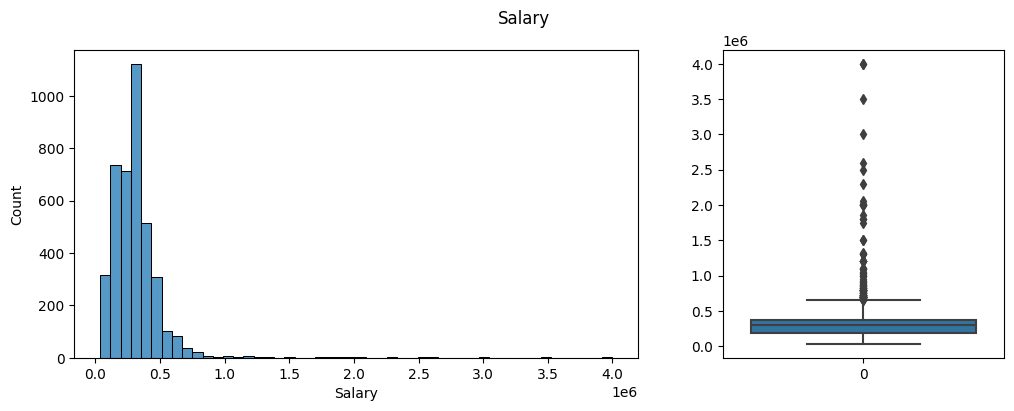

In [35]:
display(ameo['Salary'].describe().round(1))

fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
sns.histplot(ameo['Salary'], ax=ax1, bins=50)
sns.boxplot(ameo['Salary'], ax=ax2)
plt.suptitle('Salary')
plt.show()

The distribution of the "Salary" feature is skewed to the right. The log transformation can be used to deal with skewed data.

A candidate's average salary is 307699.8 INR.

<IPython.core.display.Javascript object>

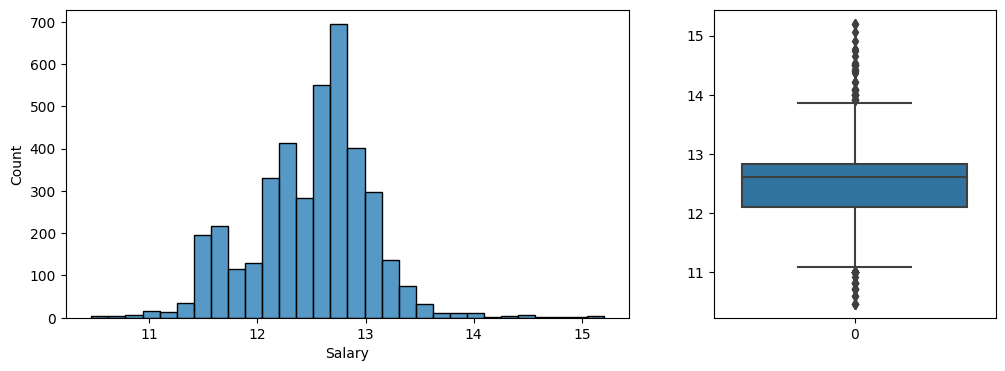

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
sns.histplot(np.log(ameo['Salary']), ax=ax1, bins=30)
sns.boxplot(np.log(ameo['Salary']), ax=ax2)
plt.show()

### "10percentage", "12percentage" and "collegeGPA"

<IPython.core.display.Javascript object>

,10percentage,12percentage,collegeGPA
count,3998.0,3998.0,3998.0
mean,77.9,74.5,71.5
std,9.9,11.0,8.2
min,43.0,40.0,6.4
25%,71.7,66.0,66.4
50%,79.2,74.4,71.7
75%,85.7,82.6,76.3
max,97.8,98.7,99.9


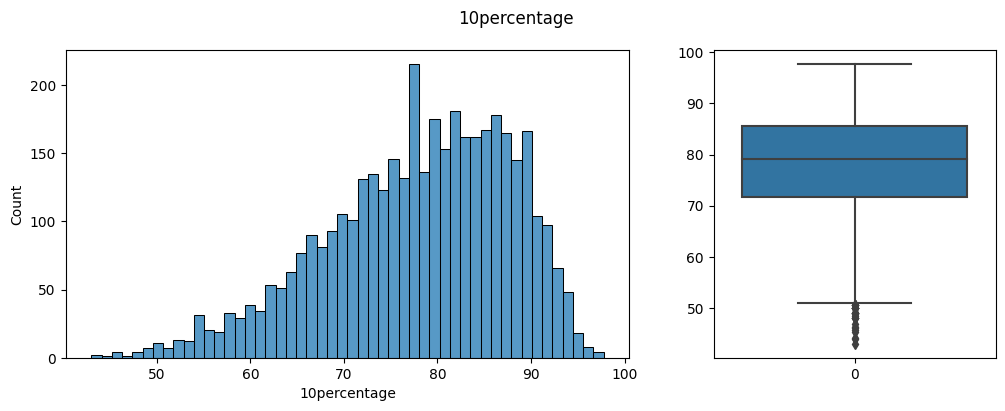

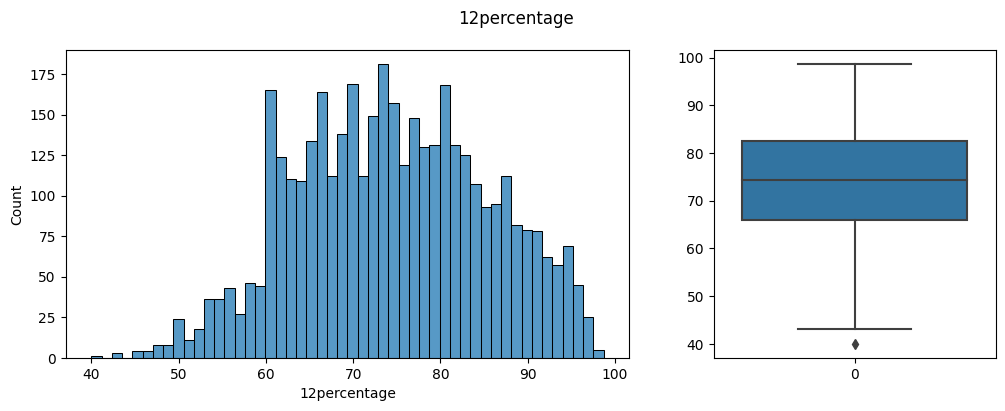

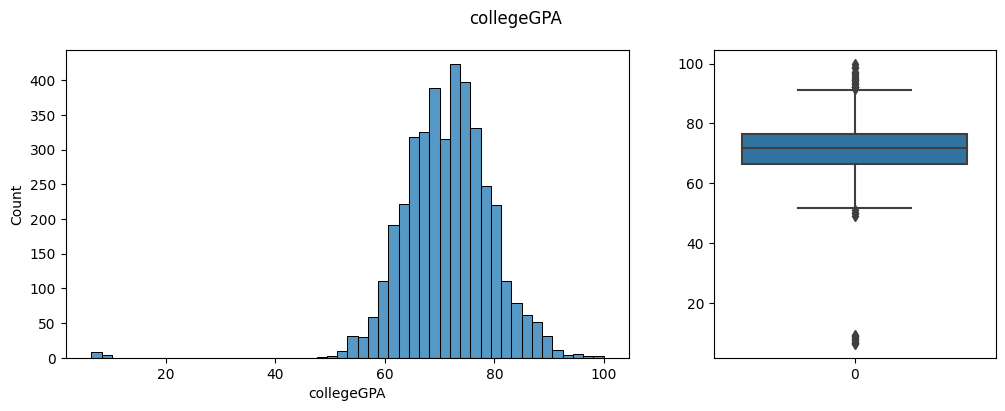

In [37]:
display(ameo[['10percentage', '12percentage', 'collegeGPA']].describe().round(1))
for col in ['10percentage', '12percentage', 'collegeGPA']:
  fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
  sns.histplot(ameo[col], ax=ax1, bins=50)
  sns.boxplot(ameo[col], ax=ax2)
  plt.suptitle(col)
  plt.show()

The column labeled "collegeGPA" contains outliers. Values less than 20 are markedly different from the other points.

The average 10th, 12th, and college grades are 77.9, 74.5, and 71.5, respectively.

<IPython.core.display.Javascript object>

<Axes: >

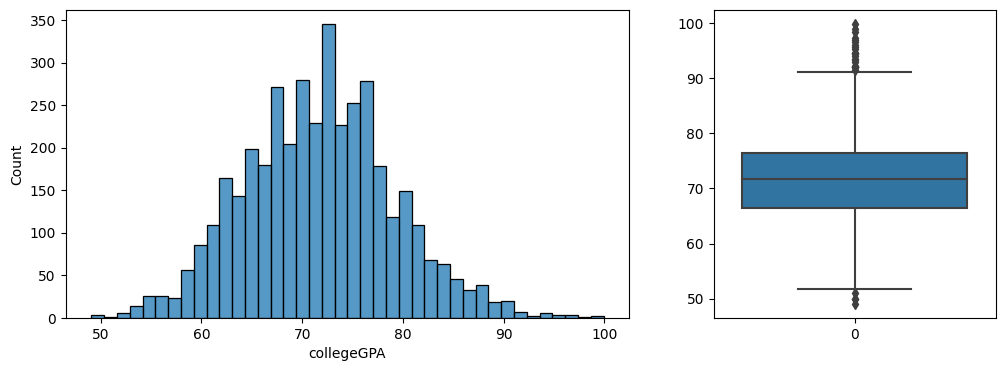

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
sns.histplot(ameo.loc[ameo['collegeGPA'] > 20, 'collegeGPA'], ax=ax1, bins=40)
sns.boxplot(ameo.loc[ameo['collegeGPA'] > 20, 'collegeGPA'], ax=ax2)

### AMCAT scores

In [39]:
unstandardized_scores = ['English',	'Logical', 'Quant',	'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon', 
                         'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
standardized_scores = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

ameo[unstandardized_scores].describe().round(1)

<IPython.core.display.Javascript object>

,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
count,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0,3998.0
mean,501.6,501.6,513.4,0.5,353.1,95.3,90.7,23.0,16.5,31.9,2.7
std,104.9,86.8,122.3,0.5,205.4,158.2,175.3,98.1,87.6,104.9,36.7
min,180.0,195.0,120.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
25%,425.0,445.0,430.0,0.3,295.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
50%,500.0,505.0,515.0,0.6,415.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
75%,570.0,565.0,595.0,0.8,495.0,233.0,-1.0,-1.0,-1.0,-1.0,-1.0
max,875.0,795.0,900.0,1.0,840.0,612.0,715.0,623.0,676.0,548.0,516.0


The value "-1" in some of the columns that represent scores could indicate missing values, so it should be replaced with NaN.

In [40]:
ameo[unstandardized_scores] = ameo[unstandardized_scores].replace(-1, np.nan)
ameo[unstandardized_scores].describe().round(1)

<IPython.core.display.Javascript object>

,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
count,3998.0,3998.0,3998.0,3752.0,3130.0,1144.0,902.0,235.0,161.0,374.0,42.0
mean,501.6,501.6,513.4,0.6,451.3,335.6,405.6,406.9,433.0,350.2,349.7
std,104.9,86.8,122.3,0.3,97.2,81.2,90.0,84.9,98.5,75.7,79.8
min,180.0,195.0,120.0,0.0,105.0,133.0,130.0,180.0,206.0,153.0,166.0
25%,425.0,445.0,430.0,0.4,385.0,292.0,346.0,362.0,366.0,287.5,292.0
50%,500.0,505.0,515.0,0.6,455.0,333.0,407.0,407.0,433.0,356.0,348.0
75%,570.0,565.0,595.0,0.8,515.0,388.0,469.0,446.0,500.0,393.0,388.0
max,875.0,795.0,900.0,1.0,840.0,612.0,715.0,623.0,676.0,548.0,516.0


<IPython.core.display.Javascript object>

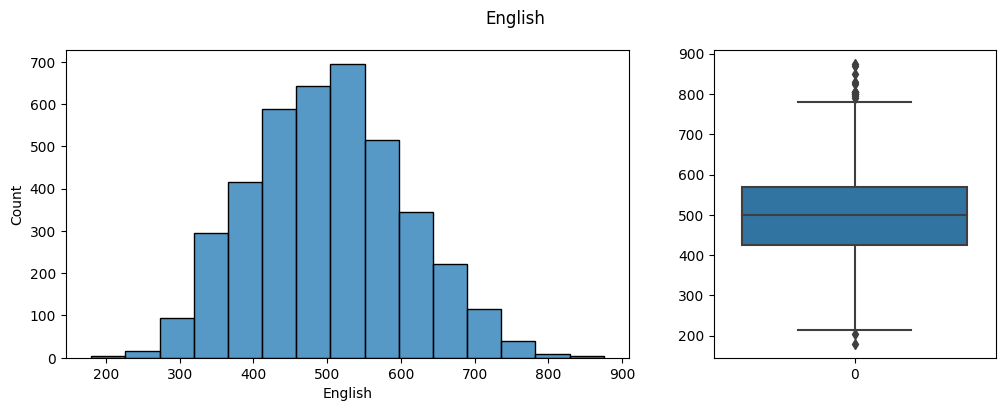

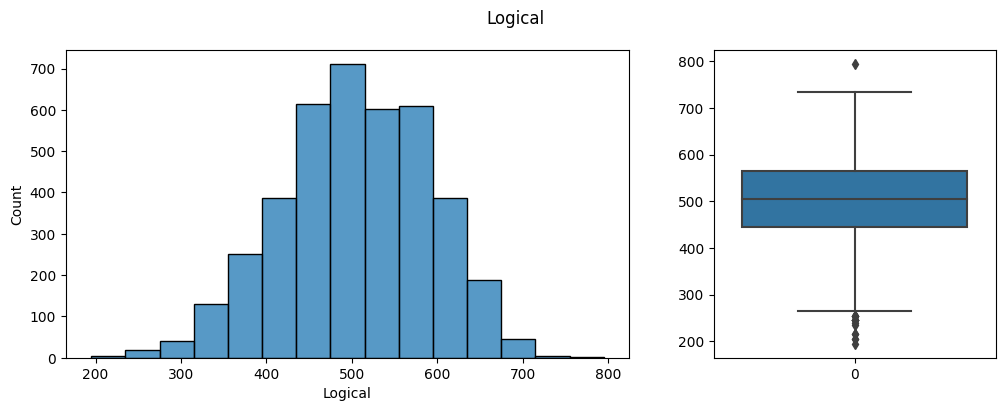

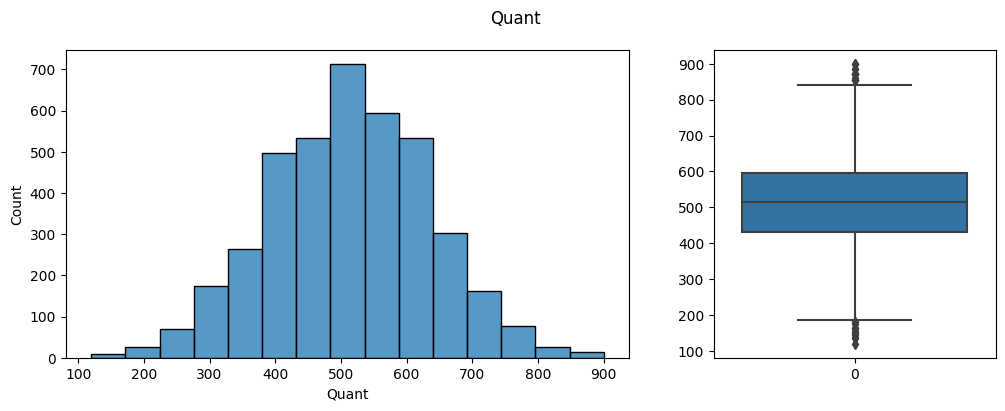

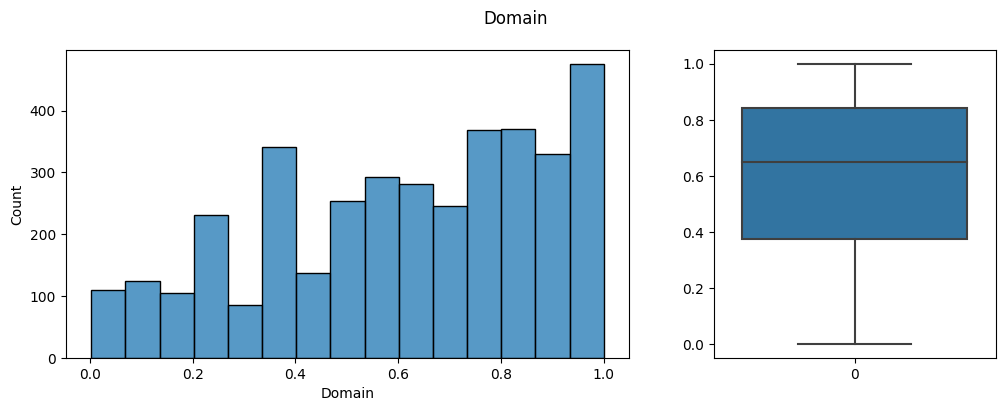

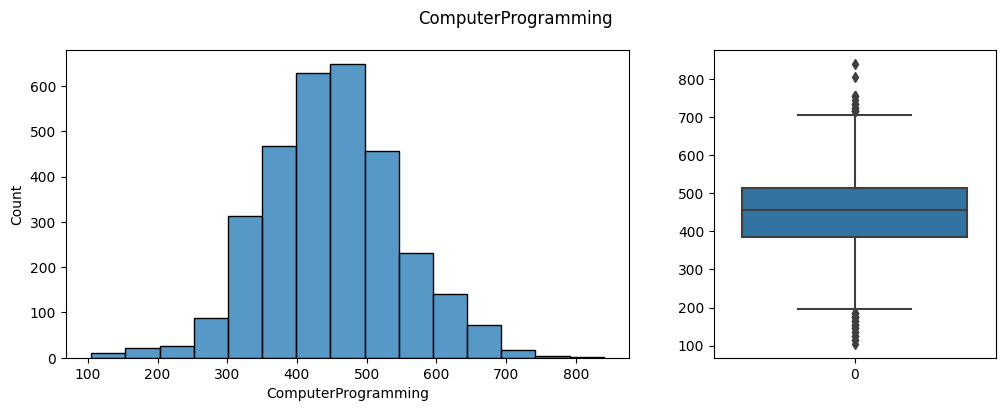

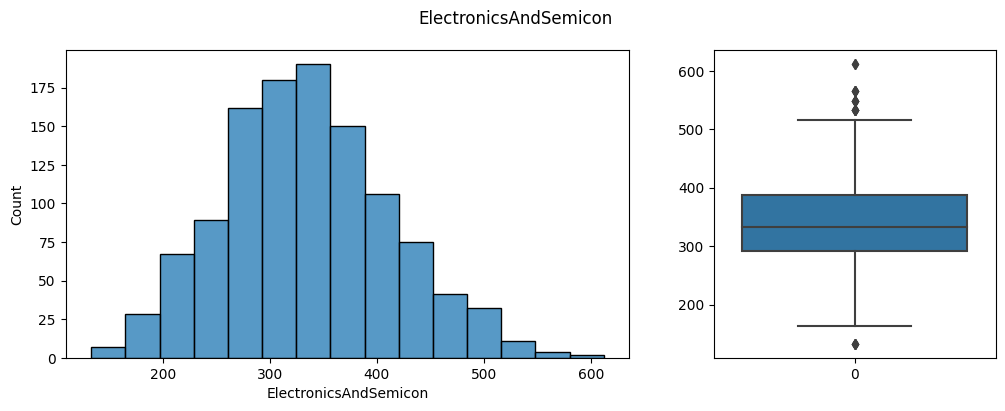

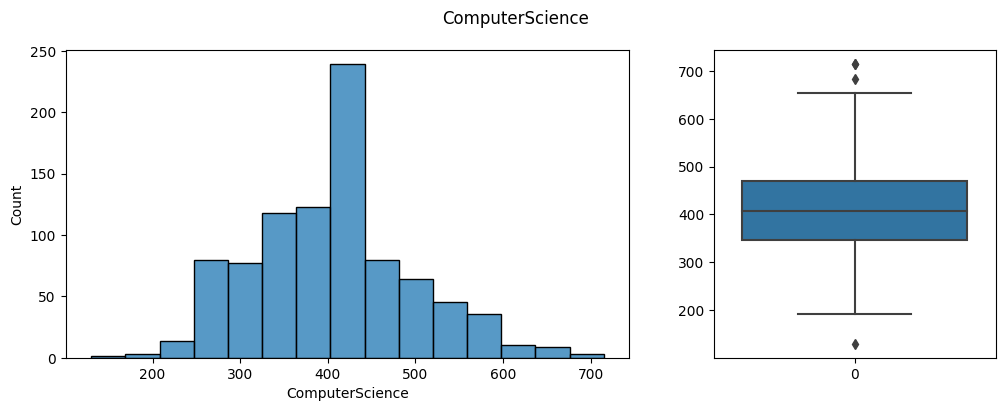

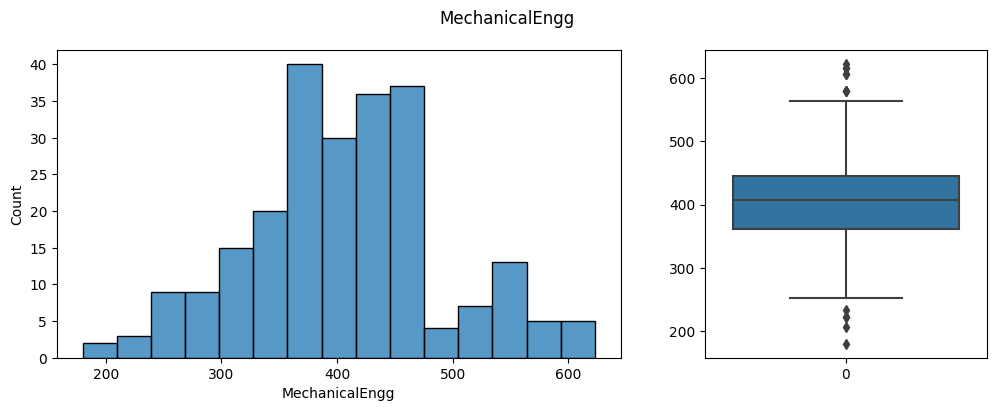

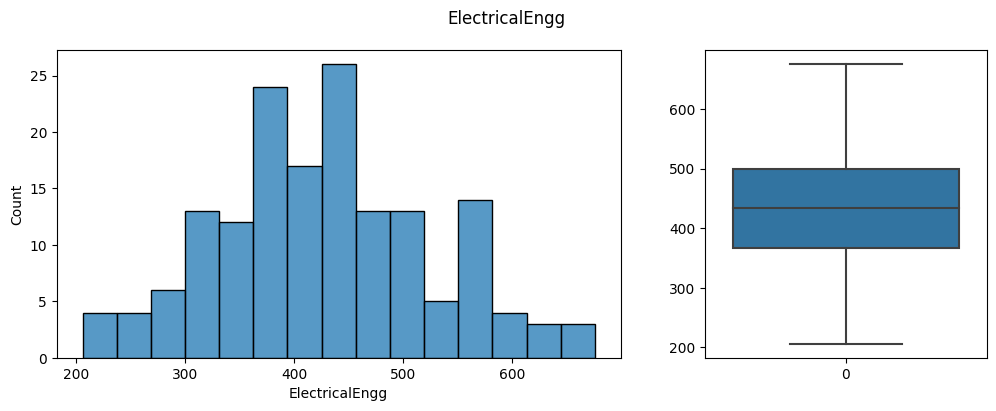

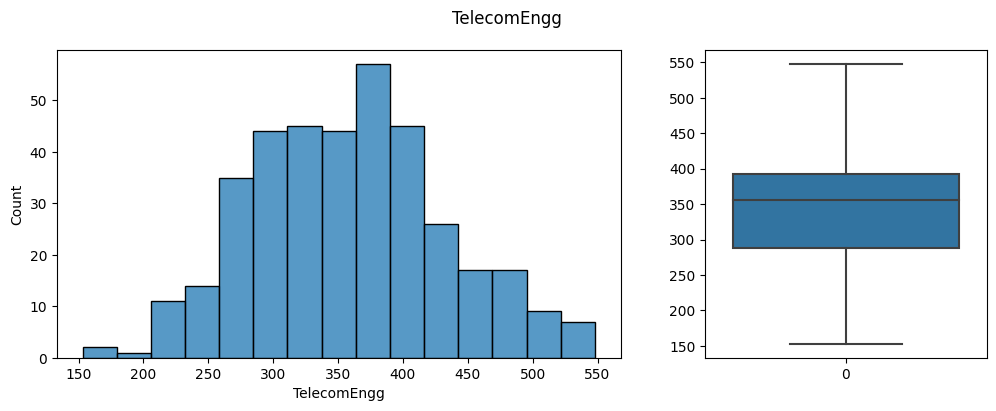

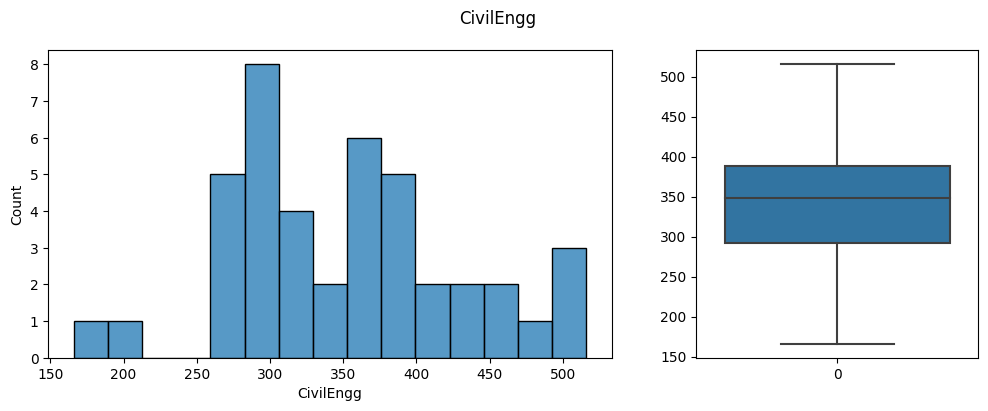

In [41]:
for col in unstandardized_scores:
  fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
  sns.histplot(ameo[col], ax=ax1, bins=15)
  sns.boxplot(ameo[col], ax=ax2)
  plt.suptitle(col)
  plt.show()

In [42]:
ameo[standardized_scores].describe().round(3)

<IPython.core.display.Javascript object>

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3998.000,3998.000,3998.000,3998.000,3998.000
mean,-0.038,0.146,0.003,-0.169,-0.138
std,1.029,0.942,0.951,1.008,1.008
min,-4.127,-5.782,-4.601,-2.643,-7.376
25%,-0.714,-0.287,-0.605,-0.868,-0.669
50%,0.046,0.212,0.091,-0.234,-0.094
75%,0.703,0.813,0.672,0.526,0.502
max,1.995,1.905,2.535,3.352,1.822


<IPython.core.display.Javascript object>

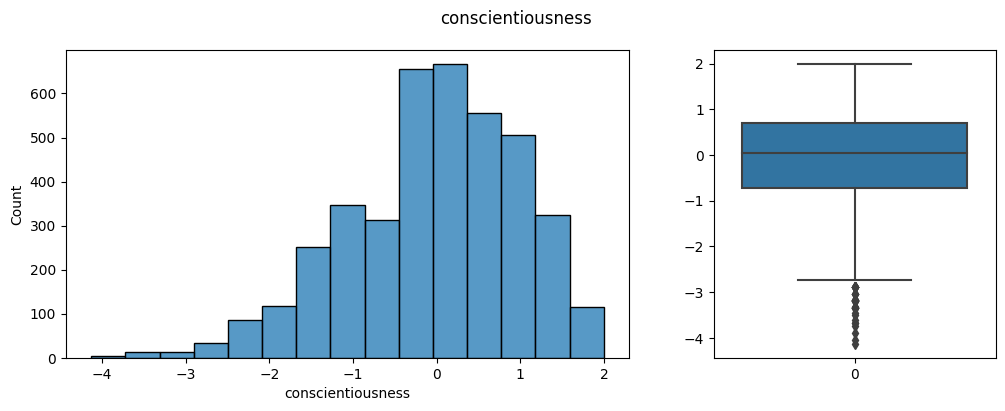

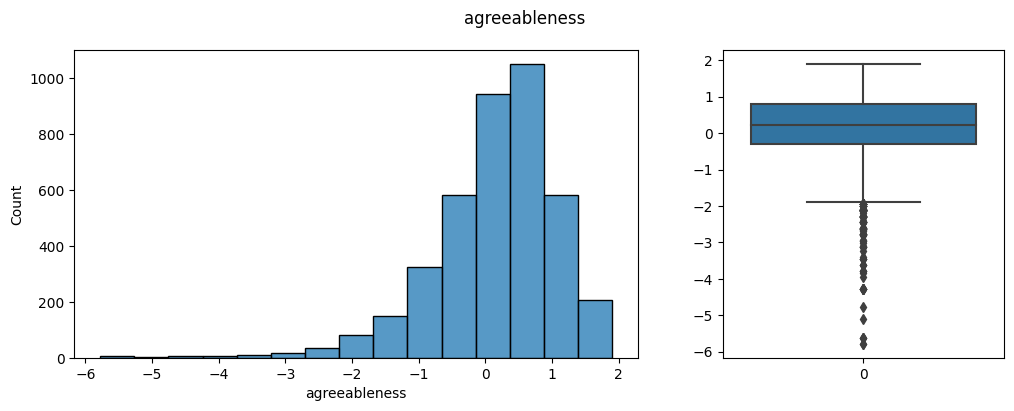

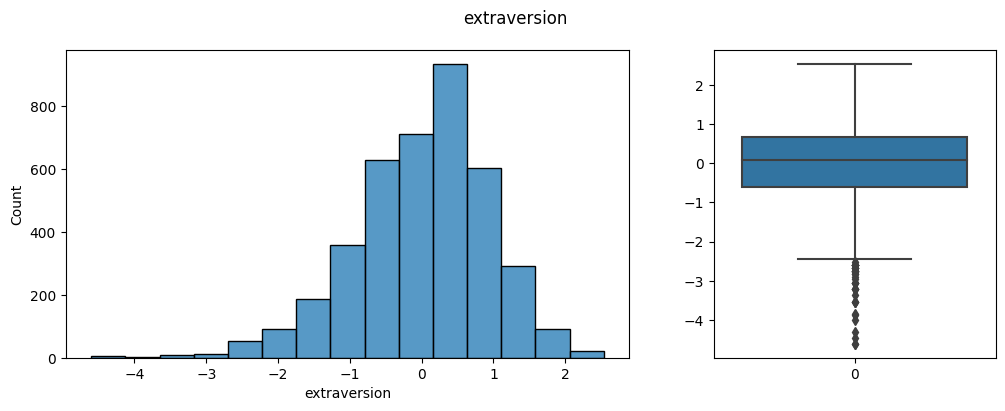

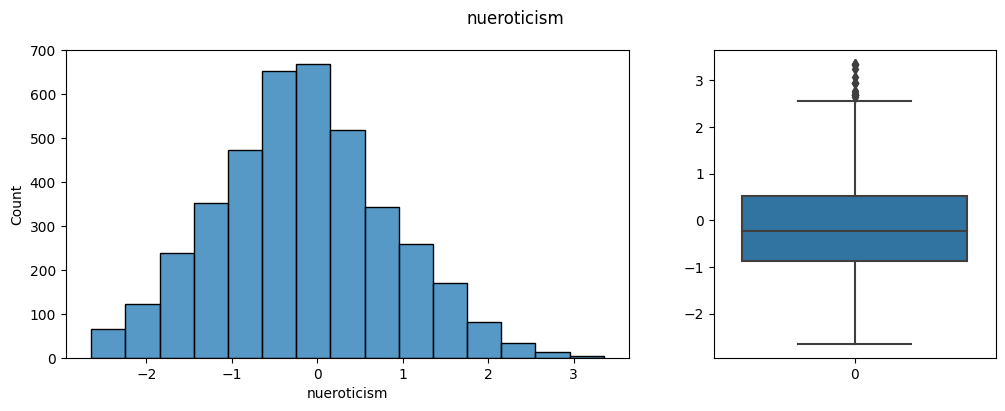

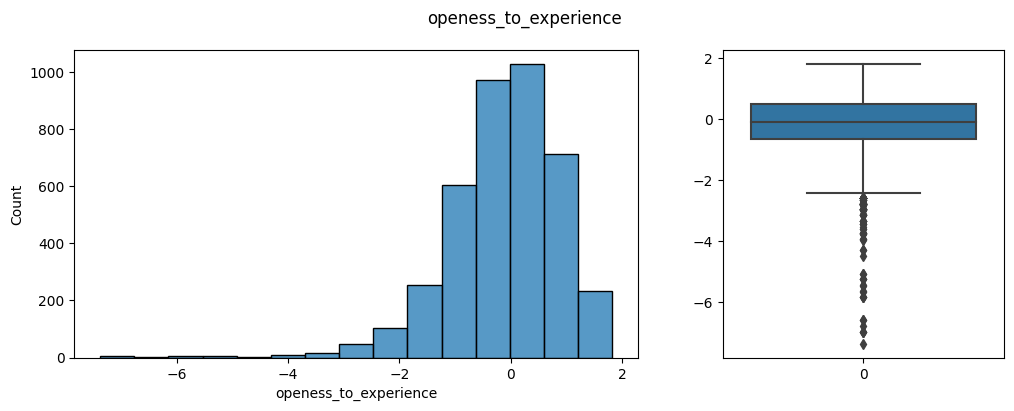

In [43]:
for col in standardized_scores:
  fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
  sns.histplot(ameo[col], ax=ax1, bins=15)
  sns.boxplot(ameo[col], ax=ax2)
  plt.suptitle(col)
  plt.show()

Except for "Domain" scores, the distributions of unstandardized scores are more or less symmetric, with a few moderate outliers.

Some distributions of standardized scores are skewed, with a lot of values less than three standard deviations from the mean.

### "Age"

<IPython.core.display.Javascript object>

count    3998.0
mean       24.6
std         1.8
min        18.0
25%        23.0
50%        24.0
75%        26.0
max        38.0
Name: Age, dtype: float64

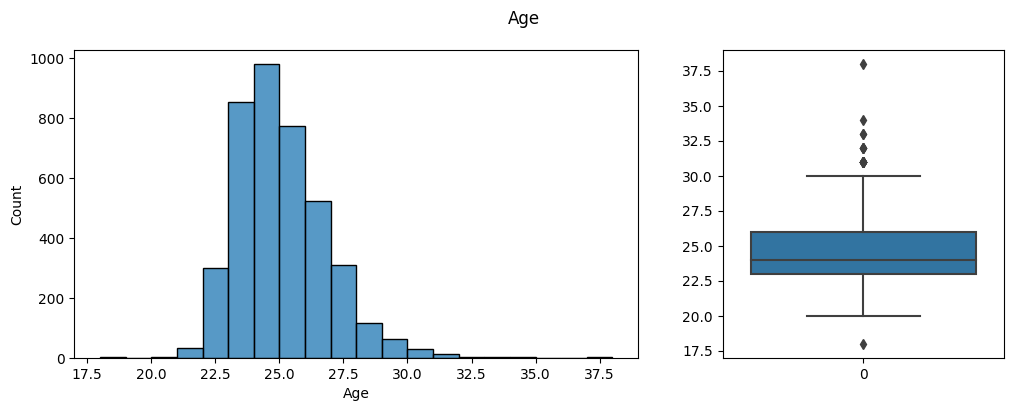

In [44]:
display(ameo['Age'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
sns.histplot(ameo['Age'], ax=ax1, bins=20)
sns.boxplot(ameo['Age'], ax=ax2)
plt.suptitle('Age')
plt.show()

The average age of graduates at the time of study was 24.6 years. The age distribution is nearly normal, with a few outliers.

### "12graduation" and "GraduationYear"

<IPython.core.display.Javascript object>

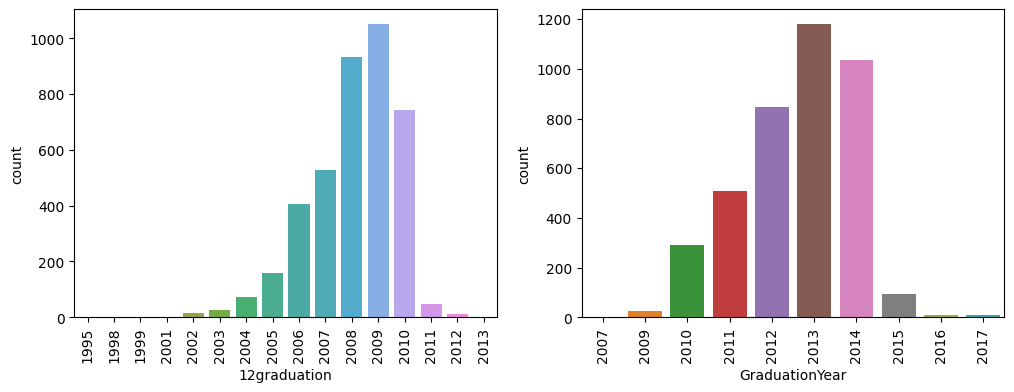

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(data=ameo, x='12graduation', ax=ax1)
sns.countplot(data=ameo.dropna(subset='GraduationYear'), x='GraduationYear', ax=ax2)
ax1.tick_params(axis='x', labelrotation = 90)
ax2.tick_params(axis='x', labelrotation = 90)
plt.show()

### "12graduationAge" and "BachGradAge"

<IPython.core.display.Javascript object>

,12graduationAge,BachGradAge
count,3998.0,3997.0
mean,17.7,22.2
std,0.9,1.2
min,13.0,17.0
25%,17.0,21.0
50%,18.0,22.0
75%,18.0,23.0
max,25.0,34.0


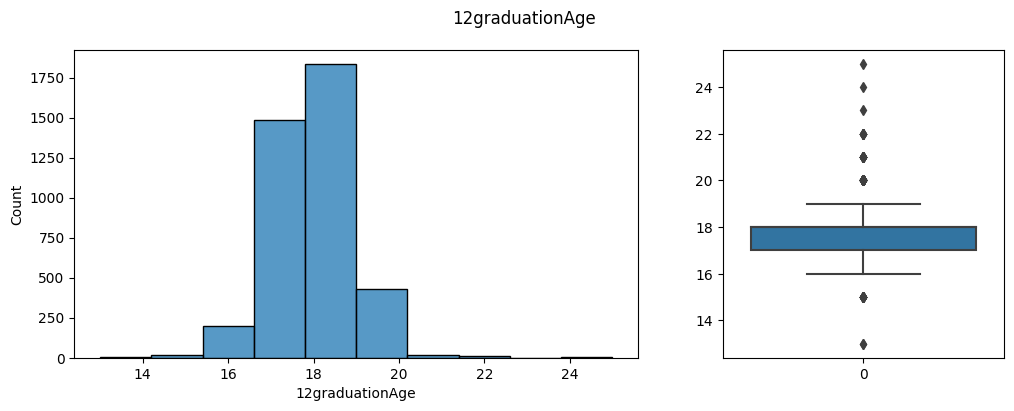

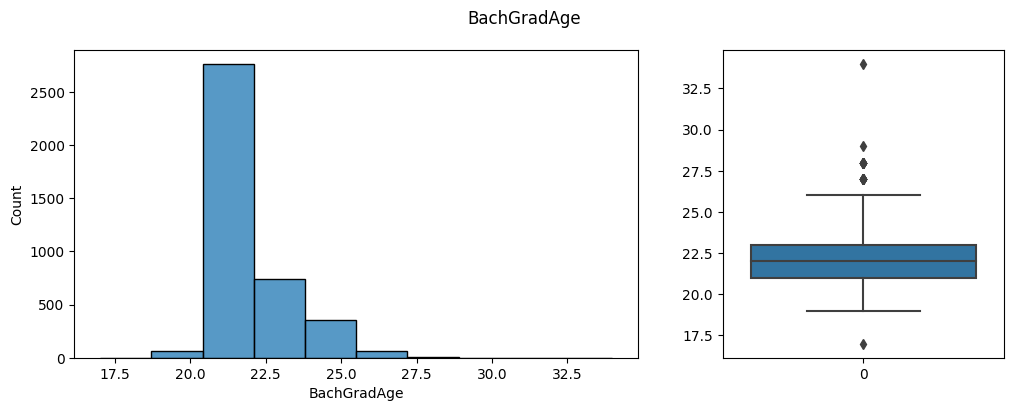

In [46]:
display(ameo[['12graduationAge', 'BachGradAge']].describe().round(1))
for col in ['12graduationAge', 'BachGradAge']:
  fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
  sns.histplot(ameo[col].dropna(), ax=ax1, bins=10)
  sns.boxplot(ameo[col].dropna(), ax=ax2)
  plt.suptitle(col)
  plt.show()

The majority of participants completed high school between 2007 and 2010 and college between 2011 and 2014.

The average graduation age for high school and college is 17.7 and 22.2 years, respectively.

### "DOJ", "DOL", "JobAge" and "JobDuration"

<IPython.core.display.Javascript object>

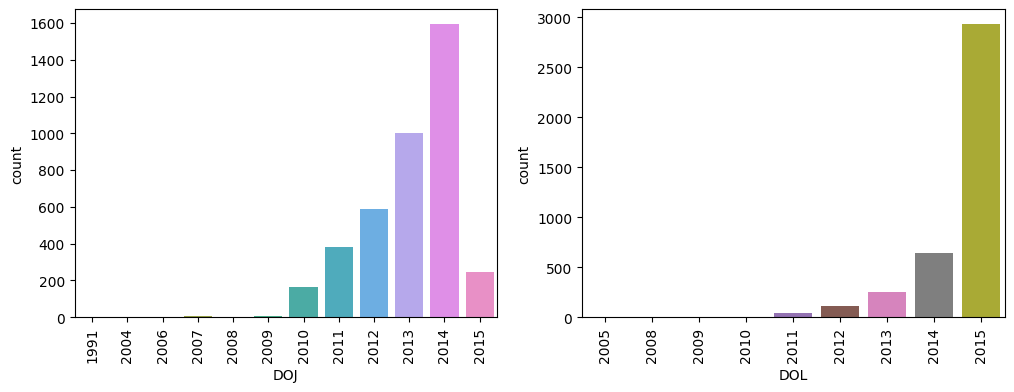

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(x=ameo['DOJ'].dt.year, ax=ax1)
sns.countplot(x=ameo['DOL'].dt.year, ax=ax2)
ax1.tick_params(axis='x', labelrotation = 90)
ax2.tick_params(axis='x', labelrotation = 90)
plt.show()

<IPython.core.display.Javascript object>

count    3997.0
mean       22.6
std         1.3
min        12.0
25%        22.0
50%        22.0
75%        23.0
max        32.0
Name: JobAge, dtype: float64

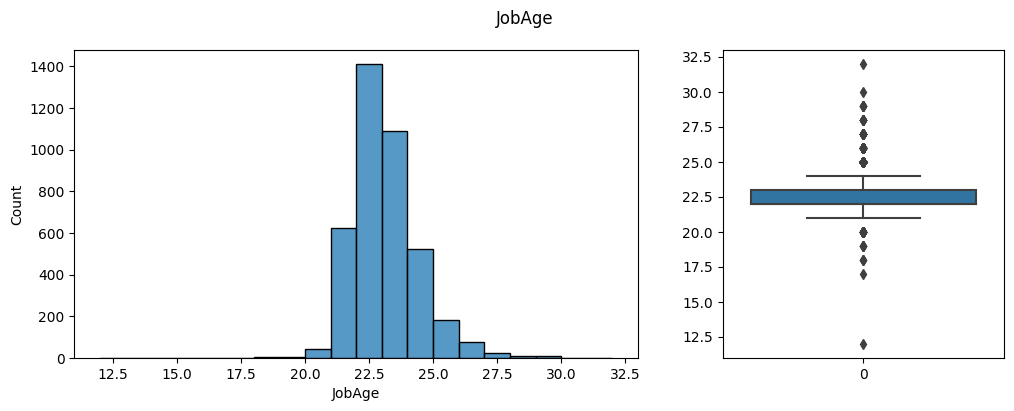

In [48]:
display(ameo['JobAge'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
sns.histplot(ameo['JobAge'], ax=ax1, bins=20)
sns.boxplot(ameo['JobAge'], ax=ax2)
plt.suptitle('JobAge')
plt.show()

<IPython.core.display.Javascript object>

count    3821.0
mean      495.9
std       378.9
min        28.0
25%       214.0
50%       365.0
75%       701.0
max      3317.0
Name: JobDuration, dtype: float64

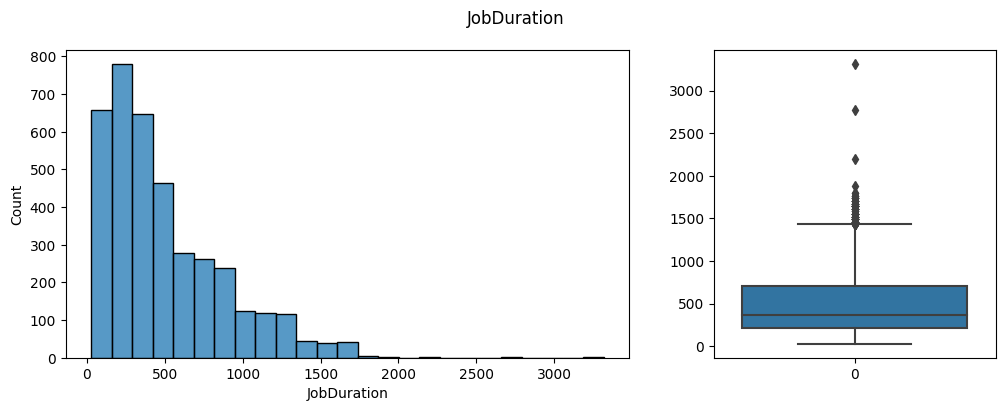

In [49]:
display(ameo['JobDuration'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[2, 1], figsize=(12,4))
sns.histplot(ameo['JobDuration'], ax=ax1, bins=25)
sns.boxplot(ameo['JobDuration'], ax=ax2)
plt.suptitle('JobDuration')
plt.show()

The majority of graduates started working between 2011 and 2014. 

The average age at which graduates began working is 22.6 years.

The average time spent at the company is 495.9 days (1.35 years).

## Categorical features

In [50]:
cat_cols = ['Gender', '10board_cleaned', '12board_cleaned', 'CollegeState', 'CollegeCityTier', 
            'CollegeTier', 'Specialty', 'Degree', 'Job', 'JobState', 'JobCity_cleaned']
ameo[cat_cols].describe(include='O')

<IPython.core.display.Javascript object>

,Gender,10board_cleaned,12board_cleaned,CollegeState,Specialty,Degree,Job,JobState,JobCity_cleaned
count,3998,3648,3639,3998,3998,3998,3998,3511,3537
unique,2,4,5,26,4,2,9,25,170
top,m,State Board,State Board,Uttar Pradesh,Computer Engineering,Bachelor,Software Engineer,Karnataka,Bangalore
freq,3041,1751,2026,915,2964,3700,962,700,682


### "Gender"

<IPython.core.display.Javascript object>

,Count,Percent
m,3041,76.1
f,957,23.9


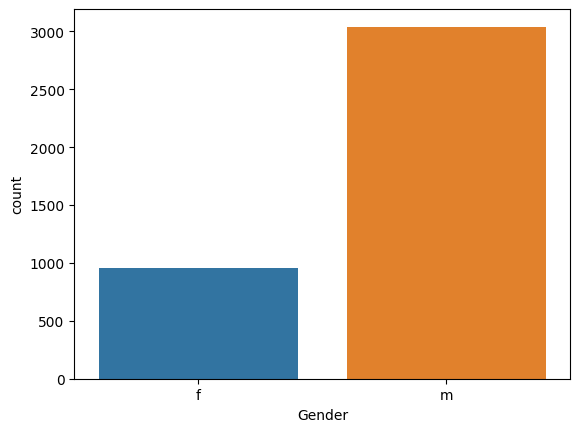

In [51]:
display(pd.concat([ameo['Gender'].value_counts().rename('Count'), 
                  ameo['Gender'].value_counts(normalize=True).mul(100).round(1).rename('Percent')], axis=1))
sns.countplot(data=ameo, x='Gender')
plt.show()

Most of the graduates are men (76.1%), with a roughly 3:1 male-to-female ratio.


### "10board_cleaned" and "12board_cleaned"

<IPython.core.display.Javascript object>

,Count,Percent
State Board,1751,48.0
CBSE,1414,38.8
ICSE,284,7.8
SSC,199,5.5


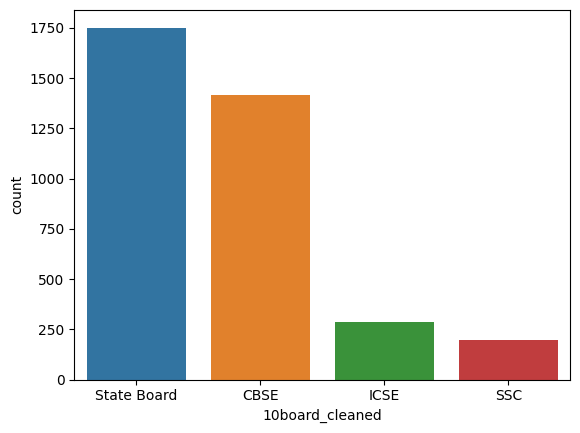

In [52]:
display(pd.concat([ameo['10board_cleaned'].value_counts().rename('Count'), 
                  ameo['10board_cleaned'].value_counts(normalize=True).mul(100).round(1).rename('Percent')], axis=1))
sns.countplot(data=ameo, x='10board_cleaned')
plt.show()

<IPython.core.display.Javascript object>

,Count,Percent
State Board,2026,55.7
CBSE,1416,38.9
ICSE,130,3.6
ISC,48,1.3
SSC,19,0.5


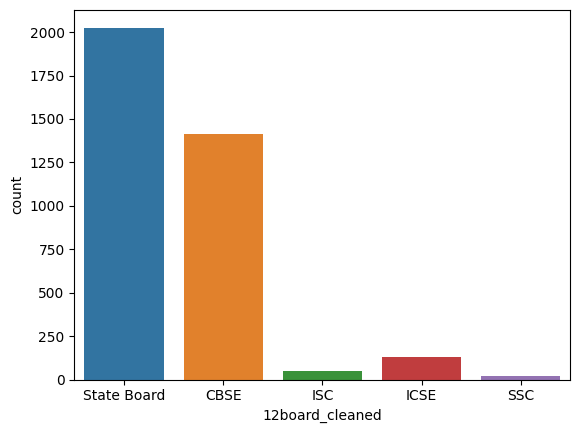

In [53]:
display(pd.concat([ameo['12board_cleaned'].value_counts().rename('Count'), 
                  ameo['12board_cleaned'].value_counts(normalize=True).mul(100).round(1).rename('Percent')], axis=1))
sns.countplot(data=ameo, x='12board_cleaned')
plt.show()

The majority of graduates completed their 10th and 12th grades through the State Board or Central Board of Secondary Education.

### "CollegeState"

<IPython.core.display.Javascript object>

,Count,Percent
Uttar Pradesh,915,22.9
Karnataka,370,9.3
Tamil Nadu,367,9.2
Telangana,319,8.0
Maharashtra,262,6.6
Andhra Pradesh,225,5.6
West Bengal,196,4.9
Punjab,193,4.8
Madhya Pradesh,189,4.7
Haryana,180,4.5


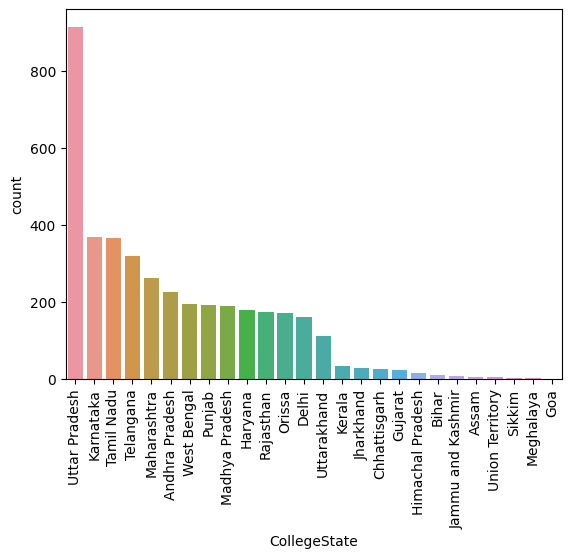

In [54]:
order = ameo['CollegeState'].value_counts().index
display(pd.concat([ameo['CollegeState'].value_counts().rename('Count'), 
                  ameo['CollegeState'].value_counts(normalize=True).mul(100).round(1).rename('Percent')], axis=1))
sns.countplot(data=ameo, x='CollegeState', order=order)
plt.xticks(rotation=90)
plt.show()

The most popular states for college studies were Uttar Pradesh, Karnataka, Tamil Nadu, and Telangana.

### "CollegeCityTier" and "CollegeTier"

<IPython.core.display.Javascript object>

,Count,Percent
0,2797,70.0
1,1201,30.0


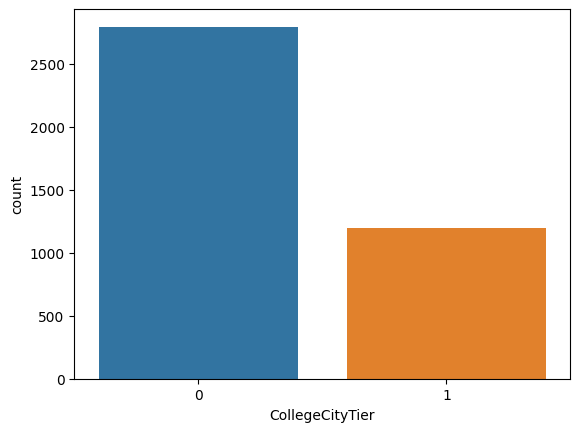

,Count,Percent
2,3701,92.6
1,297,7.4


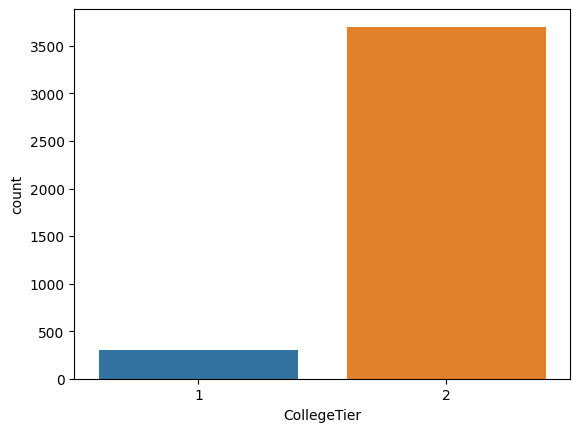

In [55]:
for col in ['CollegeCityTier', 'CollegeTier']:
  display(pd.concat([ameo[col].value_counts().rename('Count'), 
                    ameo[col].value_counts(normalize=True).mul(100).round(1).rename('Percent')], axis=1))
  sns.countplot(data=ameo, x=col)
  plt.show()

Most of the graduates studied in Tier 0 cities and attended Tier 2 colleges.

### "Specialty"

<IPython.core.display.Javascript object>

,Count,Percent
Computer Engineering,2964,74.1
Computer Science,935,23.4
Industrial Engineering,80,2.0
Other,19,0.5


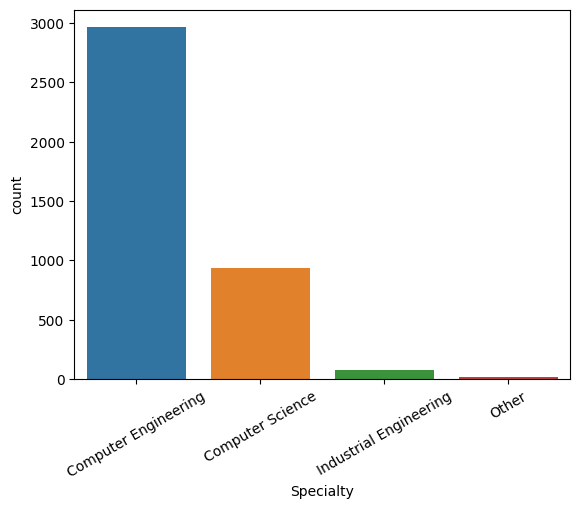

In [56]:
display(pd.concat([ameo['Specialty'].value_counts().rename('Count'), 
                  ameo['Specialty'].value_counts(normalize=True).mul(100).round(1).rename('Percent')], axis=1))
sns.countplot(data=ameo, x='Specialty')
plt.xticks(rotation=30)
plt.show()

Over 90% of graduates majored in computer engineering or computer science.

### "Degree"

<IPython.core.display.Javascript object>

,Count,Percent
Bachelor,3700,92.5
Master,298,7.5


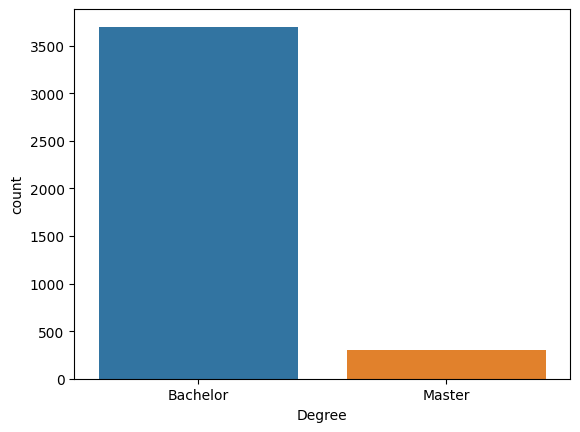

In [57]:
display(pd.concat([ameo['Degree'].value_counts().rename('Count'), 
                   ameo['Degree'].value_counts(normalize=True).mul(100).round(1).rename('Percent')], axis=1))
sns.countplot(data=ameo, x='Degree')
plt.show()

Over 90% of graduates received a bachelor's degree.

### "Job"

<IPython.core.display.Javascript object>

,Count,Percent
Software Engineer,962,24.1
Developer,753,18.8
System Engineer,477,11.9
Hardware Engineer,466,11.7
Analyst,411,10.3
Other,386,9.7
Administrator,201,5.0
Test Engineer,182,4.6
Manager,160,4.0


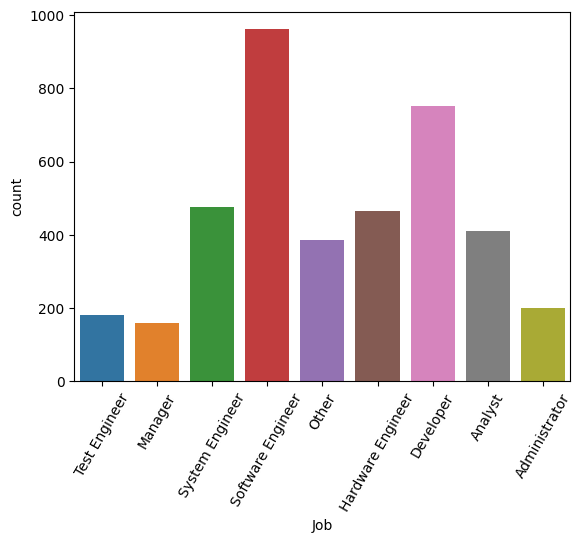

In [58]:
display(pd.concat([ameo['Job'].value_counts().rename('Count'), 
                   ameo['Job'].value_counts(normalize=True).mul(100).round(1).rename('Percent')], axis=1))
sns.countplot(data=ameo, x='Job')
plt.xticks(rotation=60)
plt.show()

Graduates are most commonly employed as software engineers and developers. Many graduates have also gone into system and hardware engineering, as well as analytics.

### "JobCity_cleaned" and"JobState"

In [59]:
pd.concat([ameo['JobCity_cleaned'].value_counts().rename('Count'), 
          ameo['JobCity_cleaned'].value_counts(normalize=True).mul(100).round(1).rename('Percent')], axis=1).head(10)

<IPython.core.display.Javascript object>

,Count,Percent
Bangalore,682,19.3
Noida,390,11.0
Hyderabad,370,10.5
Pune,327,9.2
Chennai,313,8.8
Gurgaon,223,6.3
New Delhi,206,5.8
Mumbai,122,3.4
Kolkata,120,3.4
Jaipur,54,1.5


<IPython.core.display.Javascript object>

,Count,Percent
Karnataka,700,19.9
Maharashtra,526,15.0
Uttar Pradesh,516,14.7
Telangana,375,10.7
Tamil Nadu,349,9.9
Haryana,264,7.5
Delhi,228,6.5
West Bengal,136,3.9
Madhya Pradesh,98,2.8
Rajasthan,67,1.9


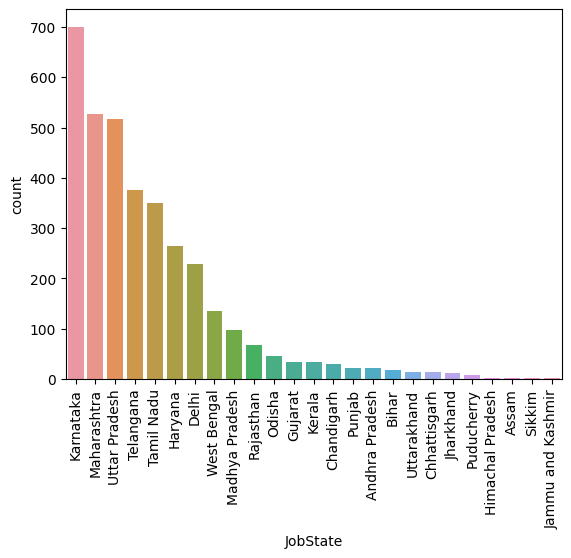

In [60]:
order = ameo['JobState'].value_counts().index
display(pd.concat([ameo['JobState'].value_counts().rename('Count'), 
                   ameo['JobState'].value_counts(normalize=True).mul(100).round(1).rename('Percent')], axis=1))
sns.countplot(data=ameo, x='JobState', order=order)
plt.xticks(rotation=90)
plt.show()

Graduates mostly work in Bangalore,	Noida, Hyderabad, Pune, and Chennai.

The most popular states for a job are Karnataka, Maharashtra, Uttar Pradesh, Telangana, and Tamil Nadu. 

# Bivariate Analysis

## "Gender" vs "Age"

<IPython.core.display.Javascript object>

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,24.4,1.6,20.0,23.0,24.0,25.0,32.0
m,3041.0,24.6,1.8,18.0,23.0,24.0,26.0,38.0


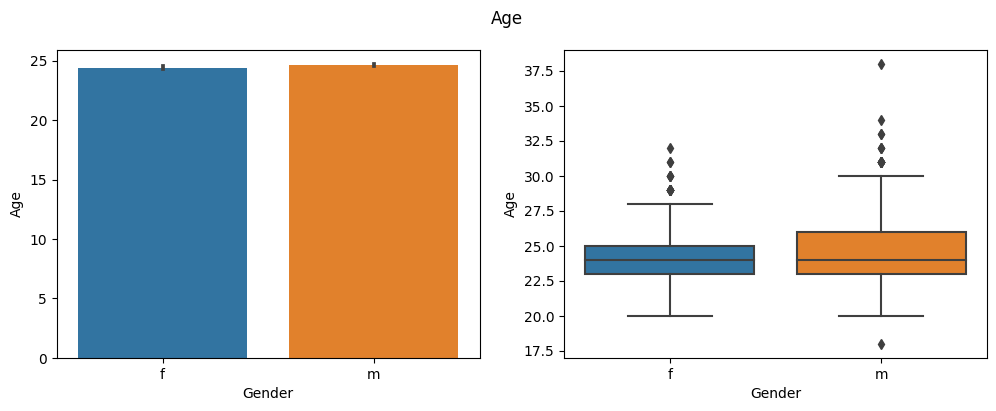

In [61]:
display(ameo.groupby('Gender')['Age'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='Age', data=ameo, ax=ax1)
sns.boxplot(x='Gender', y='Age', data=ameo, ax=ax2)
plt.suptitle('Age')
plt.show()

Male and female graduates have the same average age.

## "Gender" vs 10th and 12th grade scores

<IPython.core.display.Javascript object>

Overall marks obtained in 10th grade examinations


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,80.9,8.8,48.8,75.0,82.4,87.6,97.1
m,3041.0,77.0,10.0,43.0,70.7,78.0,85.0,97.8


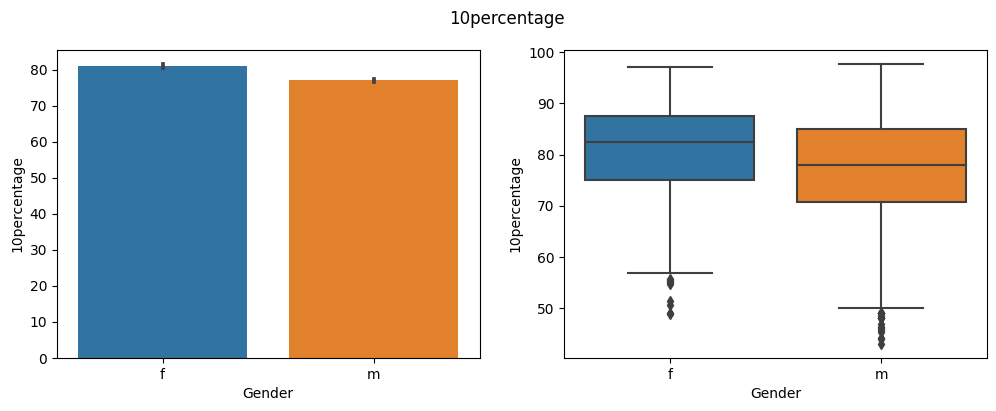


************************************************************

Overall marks obtained in 12th grade examinations


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,77.0,10.9,43.1,69.2,77.0,85.6,98.2
m,3041.0,73.7,10.9,40.0,65.2,73.4,81.8,98.7


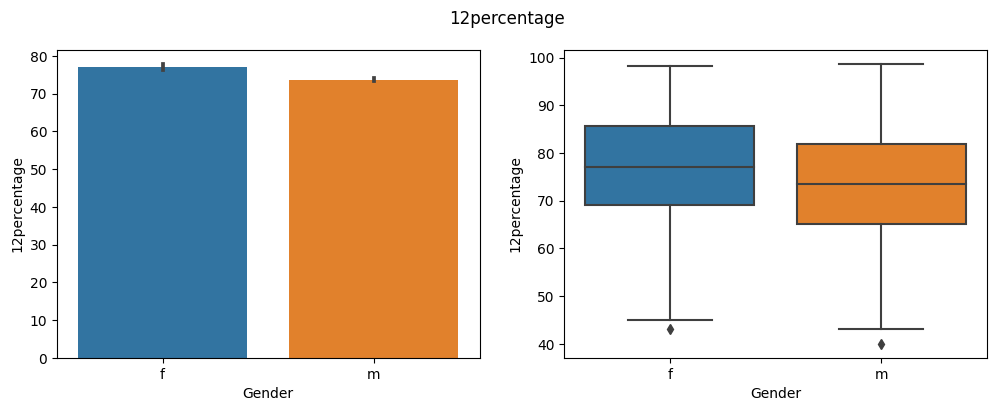

In [62]:
print('Overall marks obtained in 10th grade examinations')
display(ameo.groupby('Gender')['10percentage'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='10percentage', data=ameo, ax=ax1)
sns.boxplot(x='Gender', y='10percentage', data=ameo, ax=ax2)
plt.suptitle('10percentage')
plt.show()
print('\n', '*'*60, '\n', sep='')
print('Overall marks obtained in 12th grade examinations')
display(ameo.groupby('Gender')['12percentage'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='12percentage', data=ameo, ax=ax1)
sns.boxplot(x='Gender', y='12percentage', data=ameo, ax=ax2)
plt.suptitle('12percentage')
plt.show()

Females tend to achieve higher overall marks in 10th and 12th grades than males.

## "Gender" vs "Specialty"

<IPython.core.display.Javascript object>

Female and male Specialty counts


Specialty,Computer Engineering,Computer Science,Industrial Engineering,Other
Gender,,,,
f,693,241,22,1
m,2271,694,58,18



Female and male Specialty proportions


Specialty,Computer Engineering,Computer Science,Industrial Engineering,Other
Gender,,,,
f,72.41,25.18,2.30,0.10
m,74.68,22.82,1.91,0.59


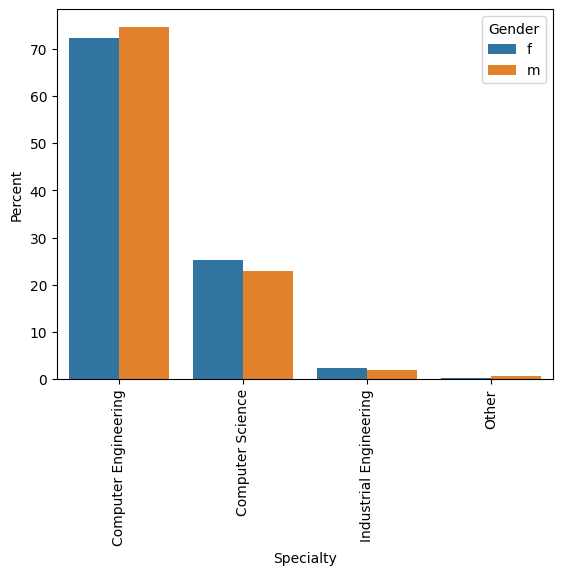

In [63]:
crosstab = pd.crosstab(index=ameo['Gender'], columns=ameo['Specialty'])
crosstab_total = pd.crosstab(index=ameo['Gender'], columns=ameo['Specialty'], margins=True).loc[['f', 'm'], 'All']
print('Female and male Specialty counts')
display(crosstab)

print('\nFemale and male Specialty proportions')
display(crosstab.div(crosstab_total, axis=0).mul(100).round(2))

props = ameo.groupby('Gender', as_index=False)['Specialty'].value_counts(normalize=True, sort=False)
sns.barplot(x=props['Specialty'], y=props['proportion'].mul(100), hue=props['Gender'])
plt.ylabel('Percent')
plt.xticks(rotation=90)
plt.show()

Female graduates are more likely than male graduates to choose a Computer Science specialty, whereas male graduates are more likely to choose Computer Engineering.

## "Gender" vs "Degree"

<IPython.core.display.Javascript object>

Female and male Degree counts


Degree,Bachelor,Master
Gender,,
f,889,68
m,2811,230



Female and male Degree proportions


Degree,Bachelor,Master
Gender,,
f,92.89,7.11
m,92.44,7.56


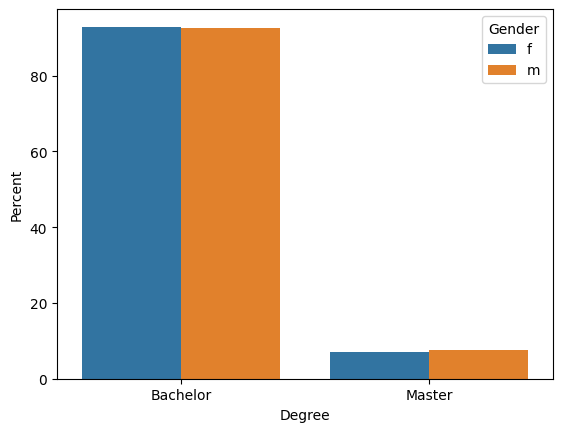

In [64]:
crosstab = pd.crosstab(index=ameo['Gender'], columns=ameo['Degree'])
crosstab_total = pd.crosstab(index=ameo['Gender'], columns=ameo['Degree'], margins=True).loc[['f', 'm'], 'All']
print('Female and male Degree counts')
display(crosstab)

print('\nFemale and male Degree proportions')
display(crosstab.div(crosstab_total, axis=0).mul(100).round(2))

props = ameo.groupby('Gender', as_index=False)['Degree'].value_counts(normalize=True, sort=False)
sns.barplot(x=props['Degree'], y=props['proportion'].mul(100), hue=props['Gender'])
plt.ylabel('Percent')
plt.show()

There is no difference between men and women in degrees obtained.

## "Gender" vs "collegeGPA"

<IPython.core.display.Javascript object>

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,74.0,7.3,9.3,70.0,74.0,78.2,99.9
m,3041.0,70.7,8.3,6.4,65.6,70.7,75.7,98.4


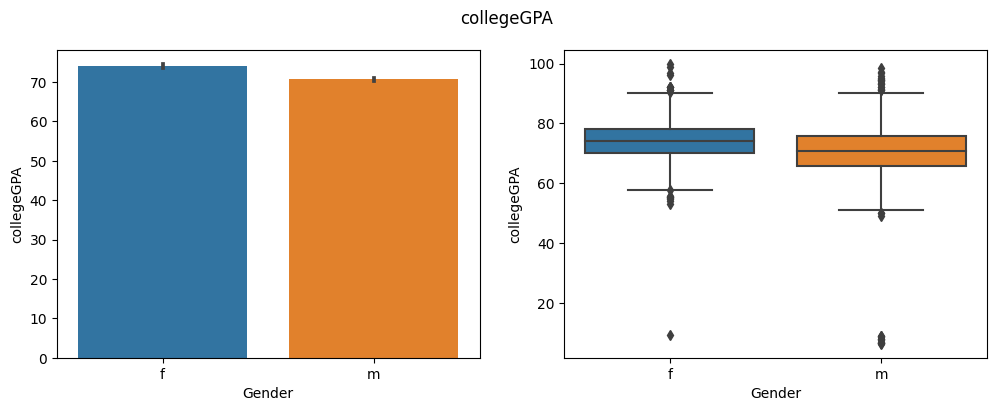

In [65]:
display(ameo.groupby('Gender')['collegeGPA'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='collegeGPA', data=ameo, ax=ax1)
sns.boxplot(x='Gender', y='collegeGPA', data=ameo, ax=ax2)
plt.suptitle('collegeGPA')
plt.show()

On average, women have higher college GPAs than men.

## "Gender" vs AMCAT scores

<IPython.core.display.Javascript object>

English scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,501.9,100.7,250.0,430.0,500.0,570.0,870.0
m,3041.0,501.6,106.3,180.0,425.0,500.0,570.0,875.0


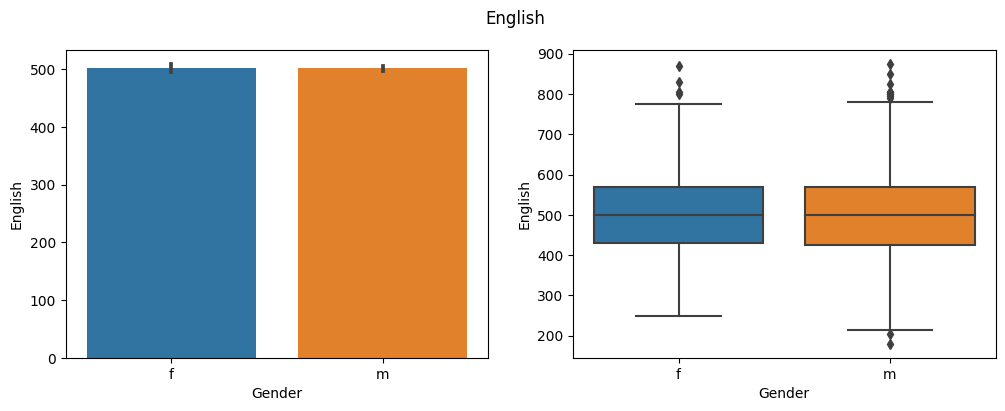

Logical scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,499.9,82.3,255.0,445.0,500.0,555.0,705.0
m,3041.0,502.1,88.1,195.0,445.0,505.0,565.0,795.0


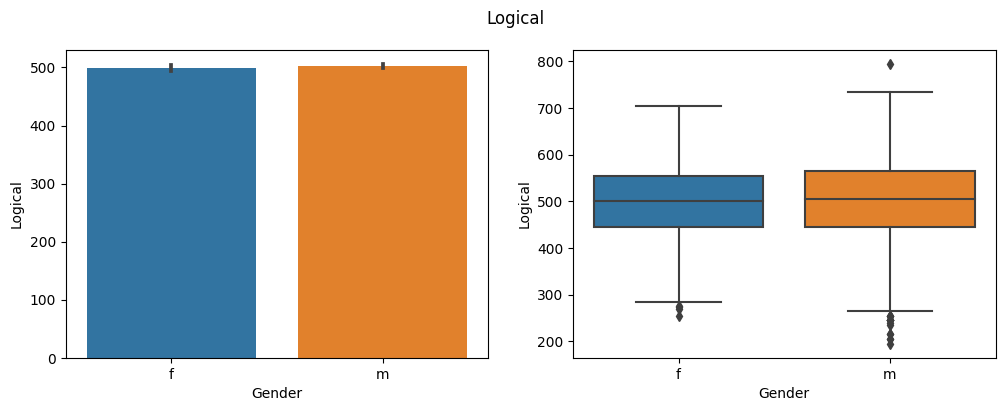

Quant scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,492.4,116.3,135.0,415.0,494.0,575.0,825.0
m,3041.0,520.0,123.4,120.0,435.0,525.0,605.0,900.0


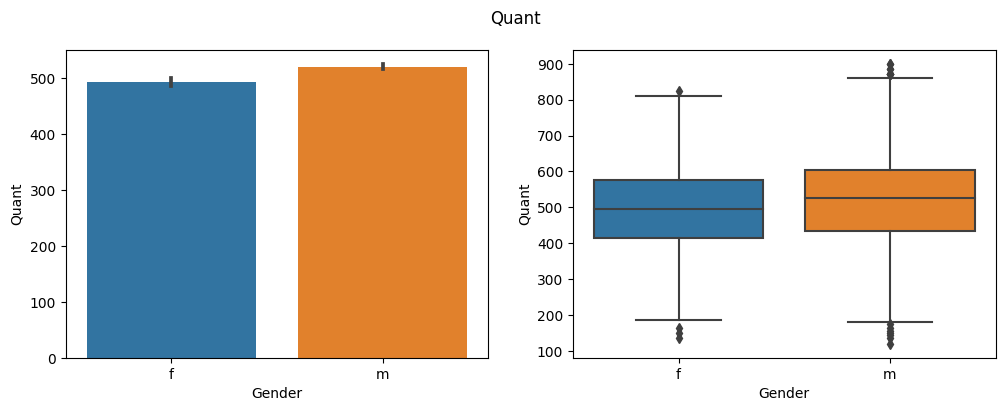

Domain scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,910.0,0.6,0.3,0.0,0.4,0.6,0.8,1.0
m,2842.0,0.6,0.3,0.0,0.4,0.6,0.8,1.0


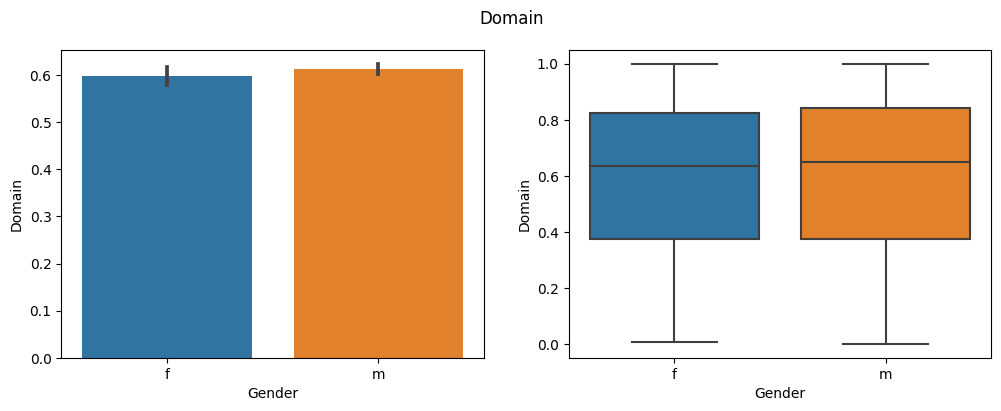

ComputerProgramming scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,786.0,441.6,83.3,105.0,385.0,445.0,495.0,745.0
m,2344.0,454.5,101.2,115.0,385.0,455.0,525.0,840.0


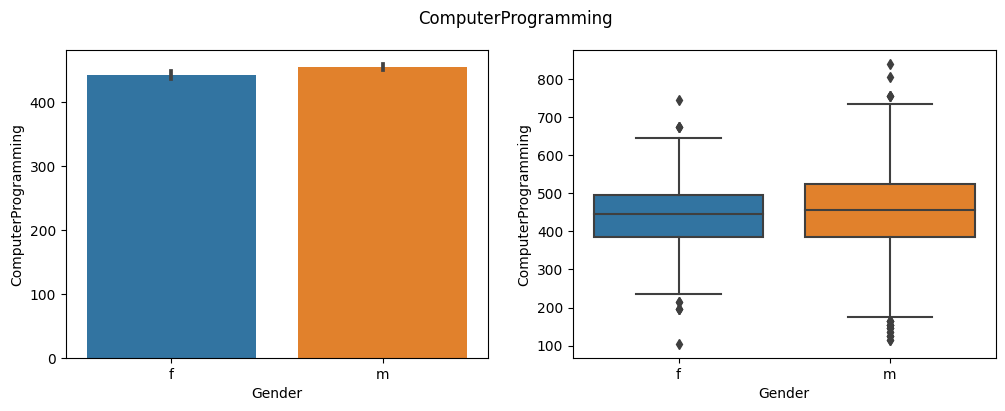

ElectronicsAndSemicon scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,268.0,330.4,77.6,133.0,292.0,333.0,371.5,612.0
m,876.0,337.3,82.2,133.0,292.0,333.0,388.0,612.0


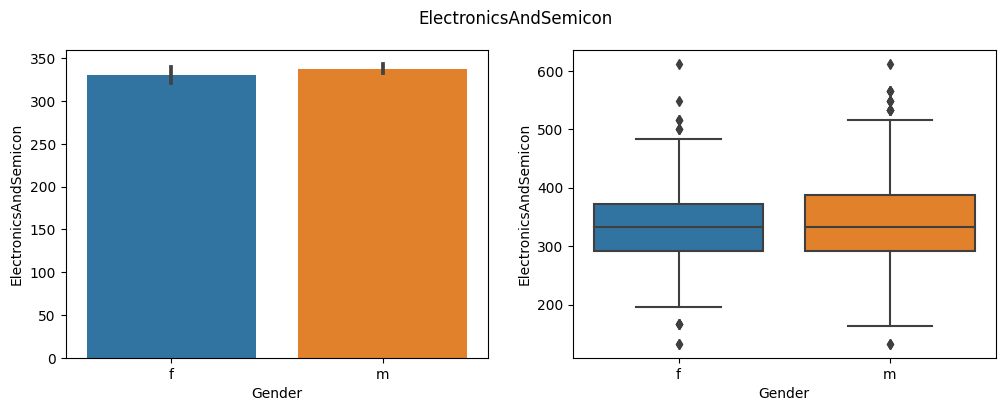

ComputerScience scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,221.0,399.5,90.6,192.0,346.0,407.0,469.0,715.0
m,681.0,407.6,89.7,130.0,346.0,407.0,469.0,715.0


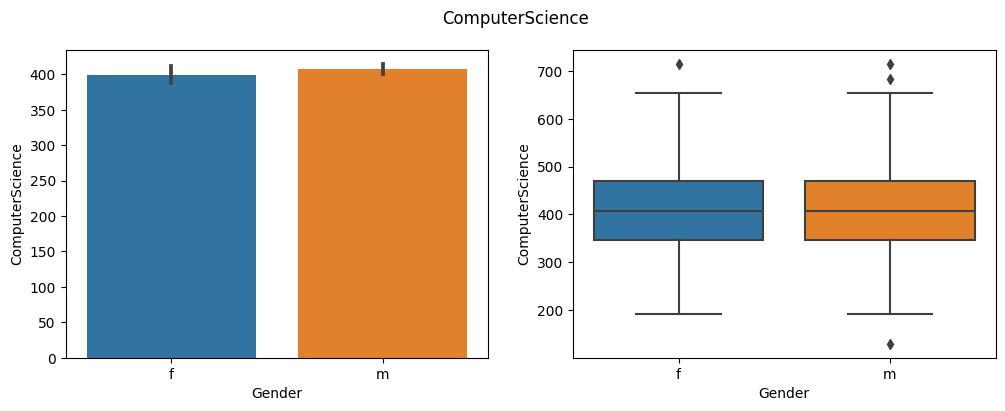

MechanicalEngg scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,17.0,418.9,73.2,313.0,376.0,409.0,446.0,606.0
m,218.0,405.9,85.8,180.0,346.0,407.0,446.0,623.0


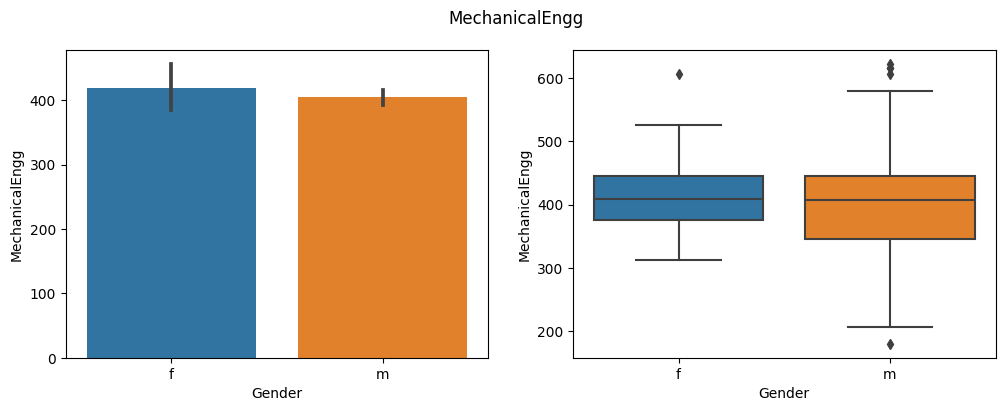

ElectricalEngg scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,30.0,415.9,112.1,206.0,328.0,393.0,473.0,633.0
m,131.0,437.0,95.2,228.0,366.0,446.0,500.0,676.0


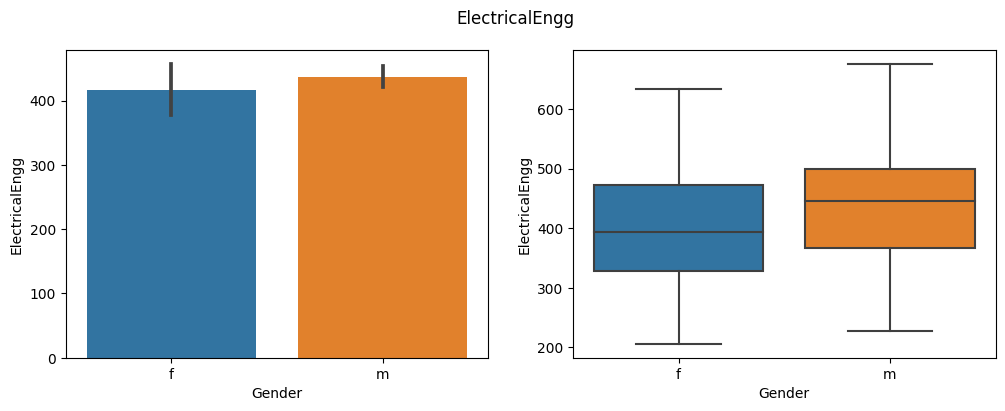

TelecomEngg scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,94.0,357.8,71.0,228.0,297.2,366.0,393.0,526.0
m,280.0,347.6,77.1,153.0,286.0,340.0,393.0,548.0


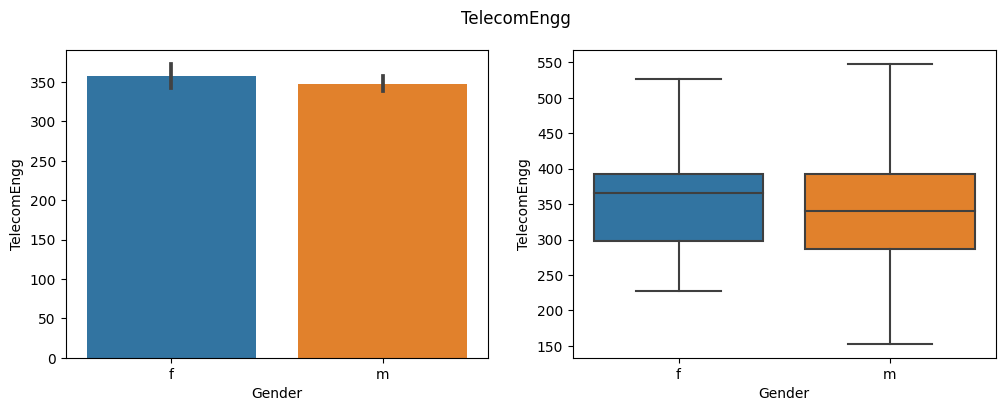

CivilEngg scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,7.0,386.9,69.5,280.0,356.0,388.0,414.0,500.0
m,35.0,342.2,80.5,166.0,292.0,322.0,388.0,516.0


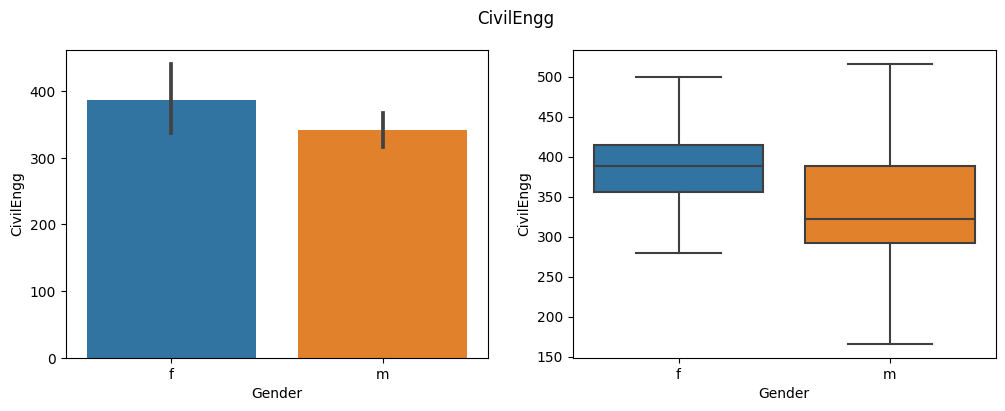

In [66]:
for col in unstandardized_scores:
  print(f'{col} scores')
  display(ameo.groupby('Gender')[col].describe().round(1))
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  sns.barplot(x='Gender', y=col, data=ameo, ax=ax1)
  sns.boxplot(x='Gender', y=col, data=ameo, ax=ax2)
  plt.suptitle(col)
  plt.show()

In the sections of English, Logical, Quantitative, Domain, Computer Programming, Electronics and Semiconductor Engineering, Computer Science, Mechanical Engineering, and Telecommunication Engineering, the differences in scores between genders are minor. In Civil Engineering, women outperform men, whereas men tend to excel in Electrical Engineering.

<IPython.core.display.Javascript object>

conscientiousness standardized scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,953.0,0.1,0.9,-2.9,-0.4,0.3,0.8,2.0
m,3015.0,-0.1,1.0,-2.9,-0.7,-0.0,0.7,2.0


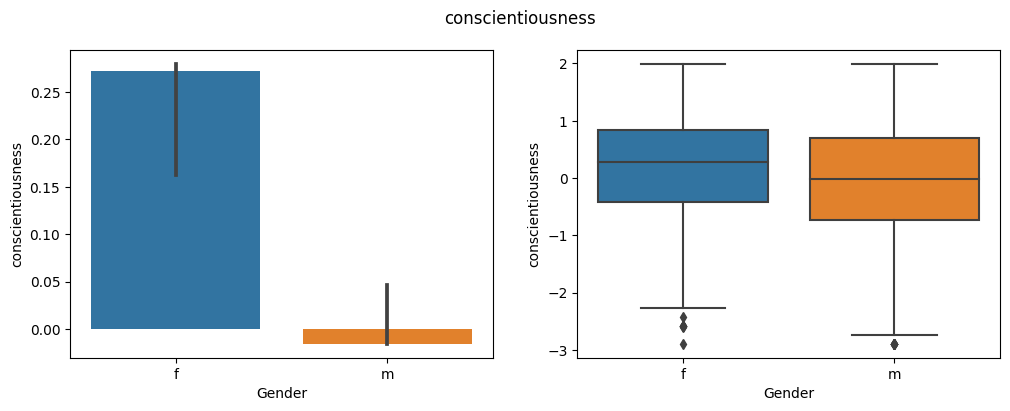

agreeableness standardized scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,950.0,0.3,0.8,-3.0,-0.1,0.4,0.9,1.9
m,3015.0,0.1,0.9,-3.0,-0.4,0.2,0.7,1.9


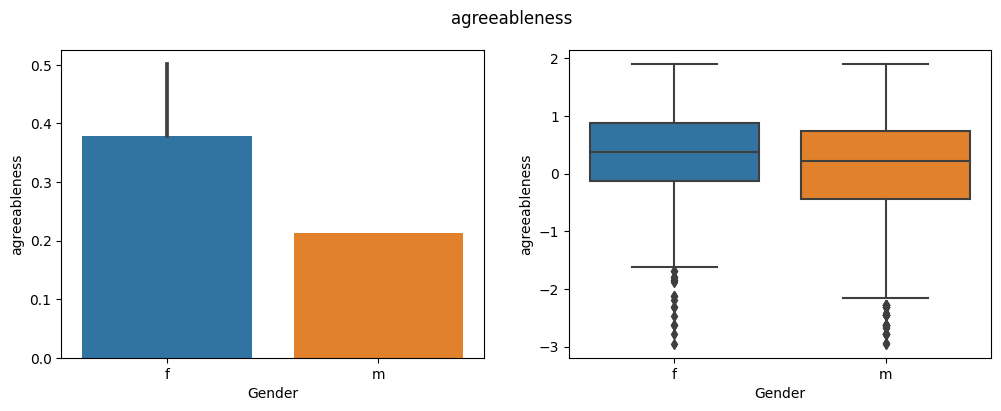

extraversion standardized scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,952.0,0.0,0.9,-3.0,-0.6,0.1,0.7,2.2
m,3027.0,0.0,0.9,-2.9,-0.6,0.1,0.7,2.5


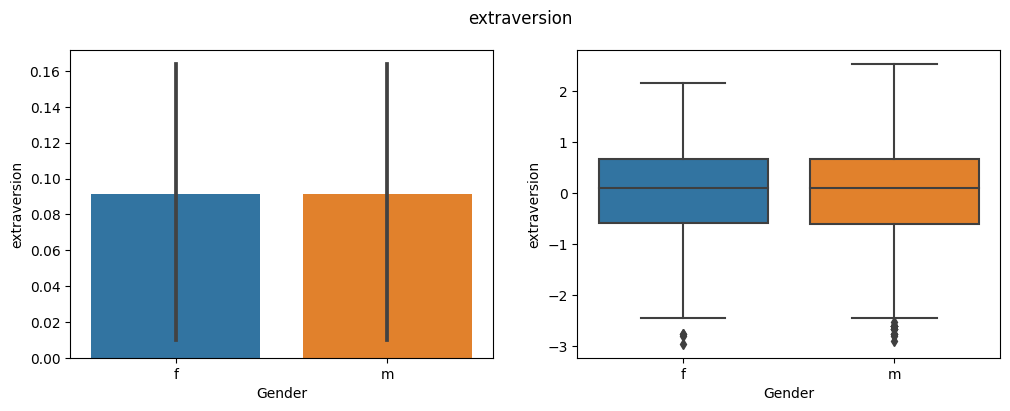

nueroticism standardized scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,-0.2,1.0,-2.6,-0.9,-0.2,0.5,2.8
m,3041.0,-0.2,1.0,-2.6,-0.9,-0.2,0.5,3.4


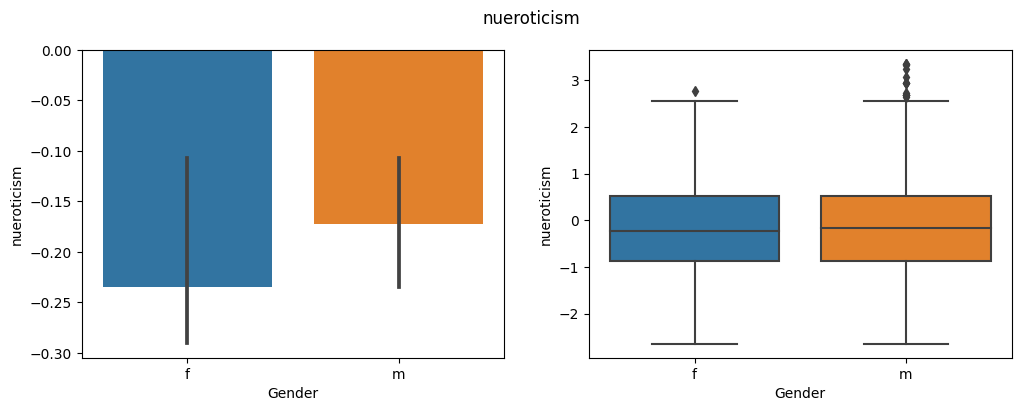

openess_to_experience standardized scores


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,946.0,0.1,0.8,-3.0,-0.4,0.2,0.7,1.8
m,3006.0,-0.1,0.9,-3.0,-0.7,-0.1,0.5,1.6


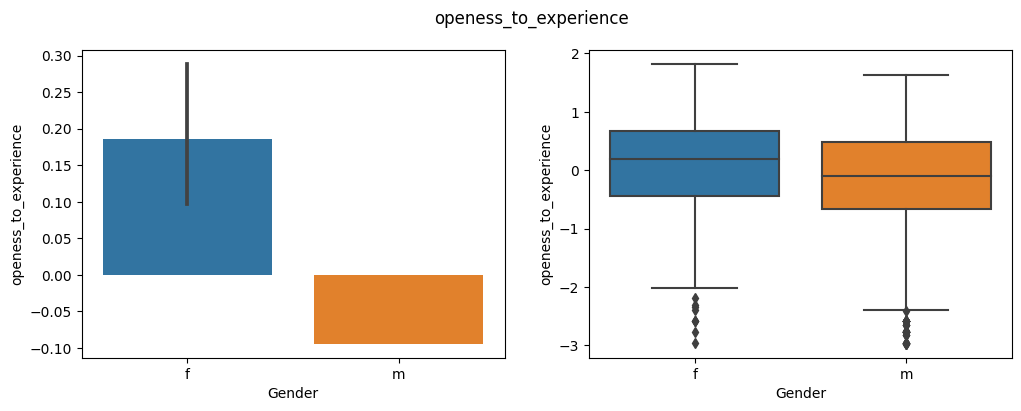

In [67]:
for col in standardized_scores:
  df_cleaned = ameo[ameo[col] >= -3]
  print(f'{col} standardized scores')
  display(df_cleaned.groupby('Gender')[col].describe().round(1))
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  sns.barplot(x='Gender', y=col, data=df_cleaned, estimator='median', ax=ax1)
  sns.boxplot(x='Gender', y=col, data=df_cleaned, ax=ax2)
  plt.suptitle(col)
  plt.show()

Women tend to score higher on personality tests such as conscientiousness, agreeableness, and openness to experience.

## "Gender" vs "Job"

<IPython.core.display.Javascript object>

Female and male Job counts


Job,Administrator,Analyst,Developer,Hardware Engineer,Manager,Other,Software Engineer,System Engineer,Test Engineer
Gender,,,,,,,,,
f,55,125,185,64,29,107,222,119,51
m,146,286,568,402,131,279,740,358,131



Female and male Job proportions


Job,Administrator,Analyst,Developer,Hardware Engineer,Manager,Other,Software Engineer,System Engineer,Test Engineer
Gender,,,,,,,,,
f,5.75,13.06,19.33,6.69,3.03,11.18,23.20,12.43,5.33
m,4.80,9.40,18.68,13.22,4.31,9.17,24.33,11.77,4.31


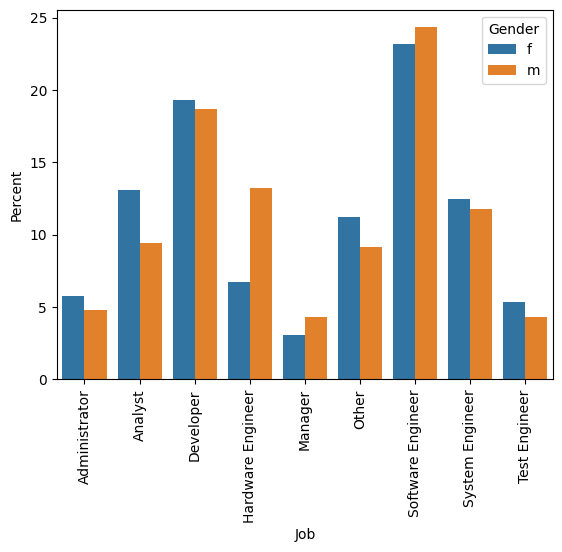

In [68]:
crosstab = pd.crosstab(index=ameo['Gender'], columns=ameo['Job'])
crosstab_total = pd.crosstab(index=ameo['Gender'], columns=ameo['Job'], margins=True).loc[['f', 'm'], 'All']
print('Female and male Job counts')
display(crosstab)

print('\nFemale and male Job proportions')
display(crosstab.div(crosstab_total, axis=0).mul(100).round(2))

props = ameo.groupby('Gender', as_index=False)['Job'].value_counts(normalize=True, sort=False)
props['proportion'] = props['proportion'] * 100
sns.barplot(x='Job', y='proportion', data=props, hue='Gender')
plt.ylabel('Percent')
plt.xticks(rotation=90)
plt.show()

Female graduates are more likely than male graduates to work as analysts, while men are more likely to work as hardware engineers. In other positions, there is almost no gender difference.

## "Gender" vs "Salary"

<IPython.core.display.Javascript object>

Normal-scaled salary


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,294937.3,191031.8,35000.0,200000.0,300000.0,355000.0,3500000.0
m,3041.0,311716.2,218999.5,35000.0,180000.0,300000.0,380000.0,4000000.0


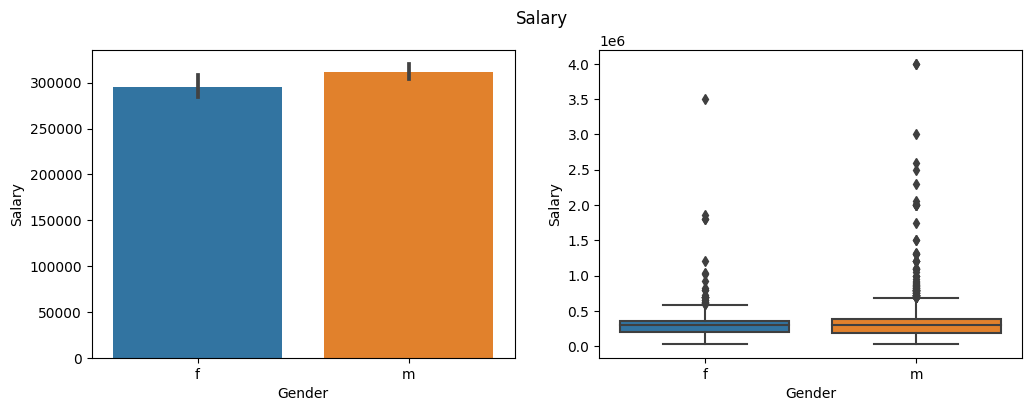


************************************************************

Log-scaled salary


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,12.458,0.525,10.463,12.206,12.612,12.780,15.068
m,3041.0,12.495,0.549,10.463,12.101,12.612,12.848,15.202


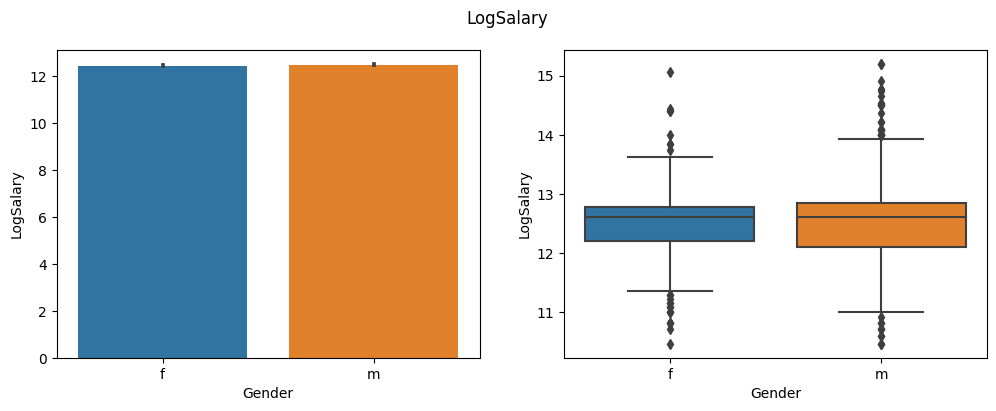

In [69]:
print('Normal-scaled salary')
display(ameo.groupby('Gender')['Salary'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='Salary', data=ameo, ax=ax1)
sns.boxplot(x='Gender', y='Salary', data=ameo, ax=ax2)
plt.suptitle('Salary')
plt.show()
print('\n', '*'*60, '\n', sep='')
print('Log-scaled salary')
new_df = ameo[['Gender']]
new_df['LogSalary'] = np.log(ameo['Salary'])
display(new_df.groupby('Gender')['LogSalary'].describe().round(3))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Gender', y='LogSalary', data=new_df, ax=ax1)
sns.boxplot(x='Gender', y='LogSalary', data=new_df, ax=ax2)
plt.suptitle('LogSalary')
plt.show()

There is a small difference in the mean salary between women and men, but it is hard to say whether this difference is significant.

## "CollegeTier" vs 10th and 12th grade scores

<IPython.core.display.Javascript object>

Overall marks obtained in 10th grade examinations


,count,mean,std,min,25%,50%,75%,max
CollegeTier,,,,,,,,
1,297.0,82.3,9.1,48.0,78.0,84.3,88.6,95.6
2,3701.0,77.6,9.8,43.0,71.2,78.8,85.2,97.8


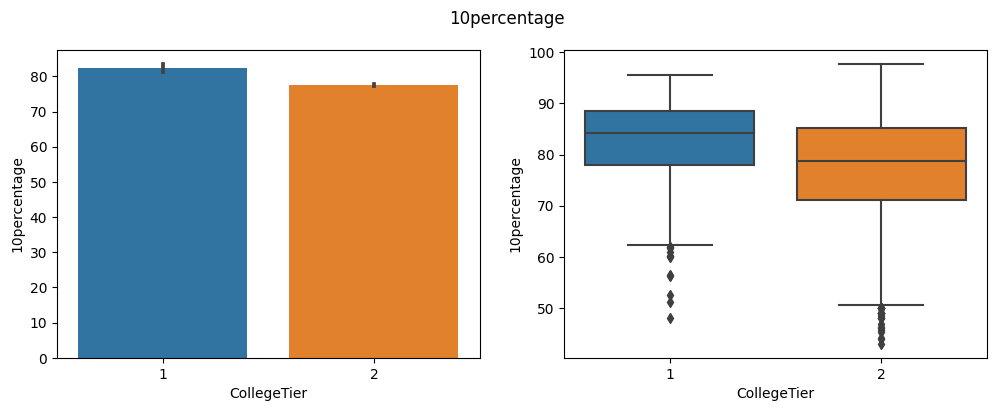


************************************************************

Overall marks obtained in 12th grade examinations


,count,mean,std,min,25%,50%,75%,max
CollegeTier,,,,,,,,
1,297.0,78.4,9.4,47.2,73.8,79.8,85.2,97.8
2,3701.0,74.2,11.1,40.0,66.0,74.0,82.3,98.7


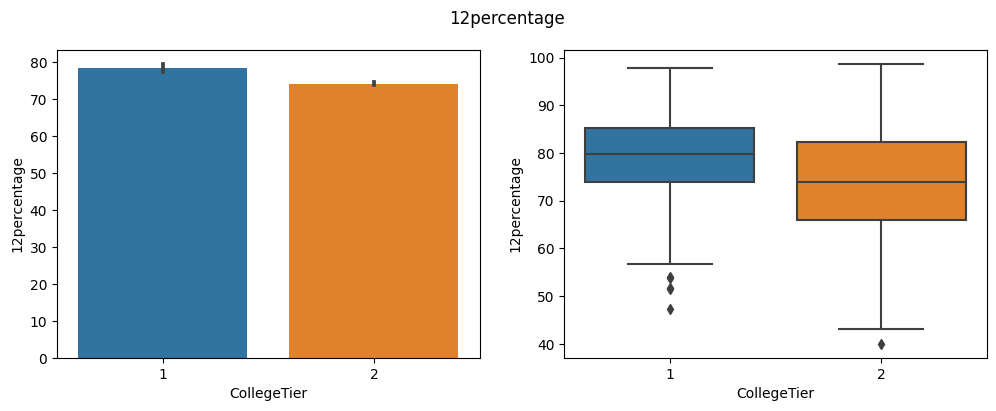

In [70]:
print('Overall marks obtained in 10th grade examinations')
display(ameo.groupby('CollegeTier')['10percentage'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CollegeTier', y='10percentage', data=ameo, ax=ax1)
sns.boxplot(x='CollegeTier', y='10percentage', data=ameo, ax=ax2)
plt.suptitle('10percentage')
plt.show()
print('\n', '*'*60, '\n', sep='')
print('Overall marks obtained in 12th grade examinations')
display(ameo.groupby('CollegeTier')['12percentage'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CollegeTier', y='12percentage', data=ameo, ax=ax1)
sns.boxplot(x='CollegeTier', y='12percentage', data=ameo, ax=ax2)
plt.suptitle('12percentage')
plt.show()

Graduates with higher school grades had a better chance of enrolling in Tier 1 colleges.

## "CollegeTier" vs "CollegeGPA"

<IPython.core.display.Javascript object>

,count,mean,std,min,25%,50%,75%,max
CollegeTier,,,,,,,,
1,297.0,74.0,9.5,8.6,69.4,74.3,79.3,99.9
2,3701.0,71.3,8.0,6.4,66.0,71.4,76.1,99.0


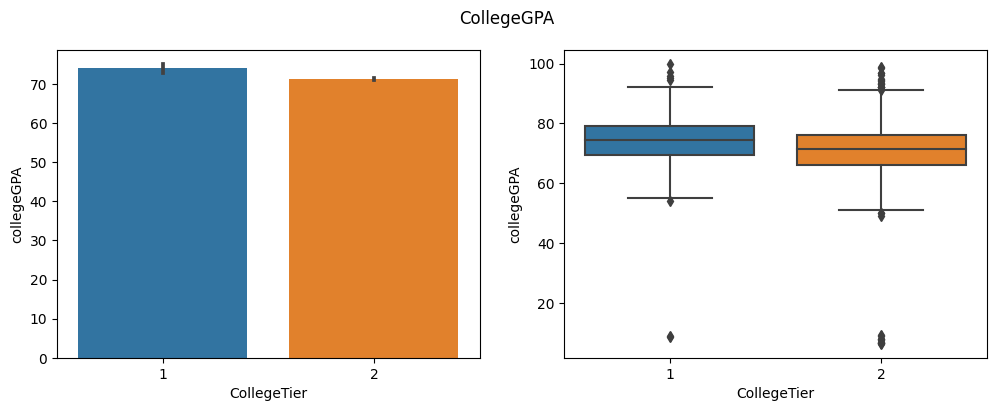

In [71]:
display(ameo.groupby('CollegeTier')['collegeGPA'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CollegeTier', y='collegeGPA', data=ameo, ax=ax1)
sns.boxplot(x='CollegeTier', y='collegeGPA', data=ameo, ax=ax2)
plt.suptitle('CollegeGPA')
plt.show()

Graduates from Tier 1 colleges have higher average grades.

## "Salary" vs numerical features

<IPython.core.display.Javascript object>

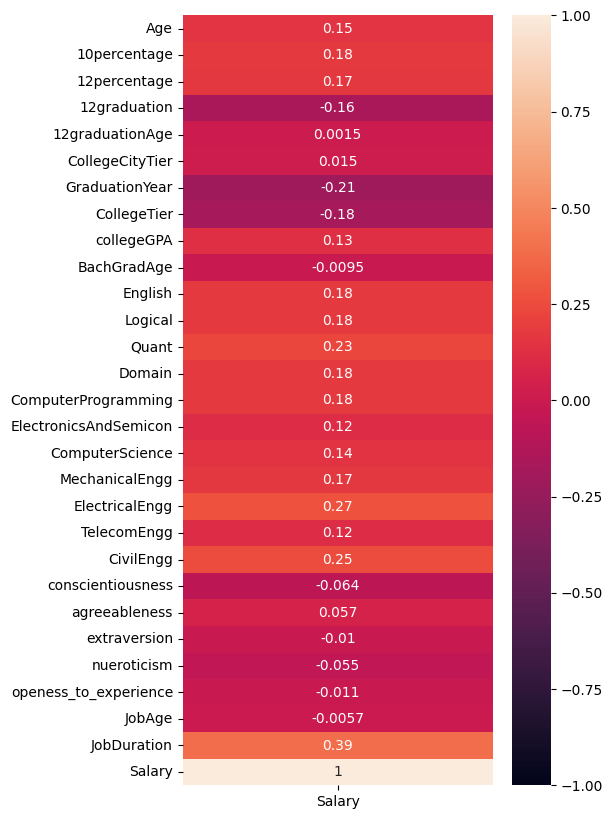

In [72]:
plt.figure(figsize=(5,10))
sns.heatmap(ameo.corr()[['Salary']], vmin=-1, vmax=1, annot=True)
plt.show()

A graduate's salary has a weak positive correlation with age, school grades, college grades, and AMCAT scores (but not with personality test scores). Salary and time at the company have the strongest correlation.

### "Salary" vs "Age"

<IPython.core.display.Javascript object>

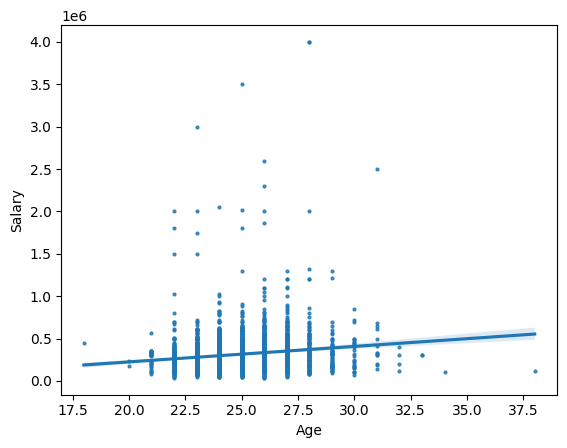

In [73]:
sns.regplot(x='Age', y='Salary', data=ameo, scatter_kws={'s':4})
plt.show()

### "Salary" vs school and college grades

<IPython.core.display.Javascript object>

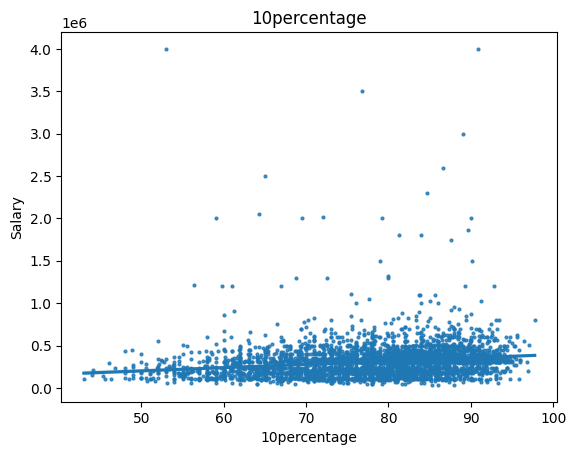

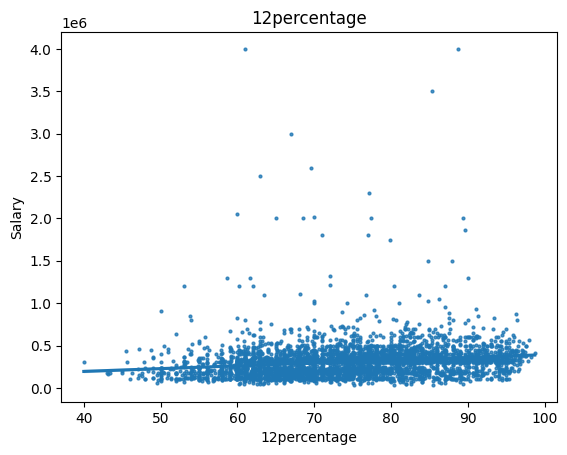

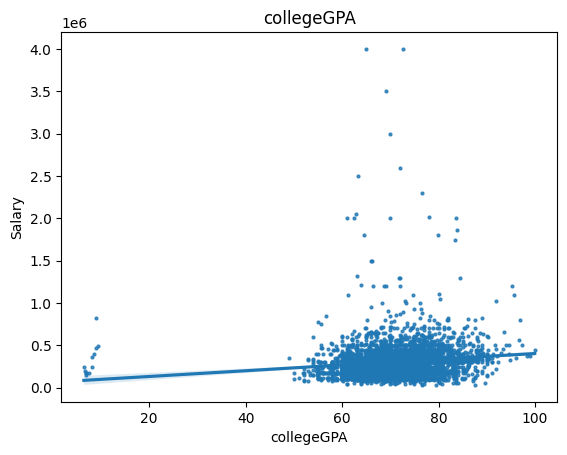

In [74]:
for col in ['10percentage','12percentage', 'collegeGPA']:
  sns.regplot(x=col, y='Salary', data=ameo, scatter_kws={'s':4})
  plt.title(col)
  plt.show()

### "Salary" vs AMCAT scores

<IPython.core.display.Javascript object>

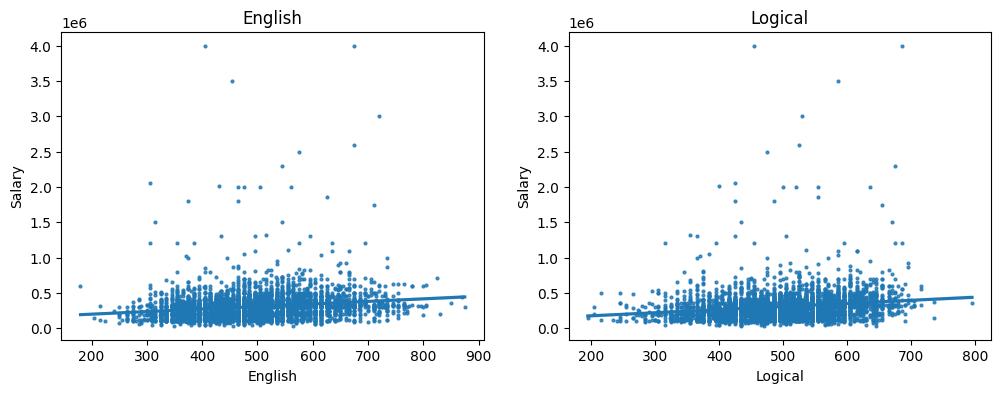

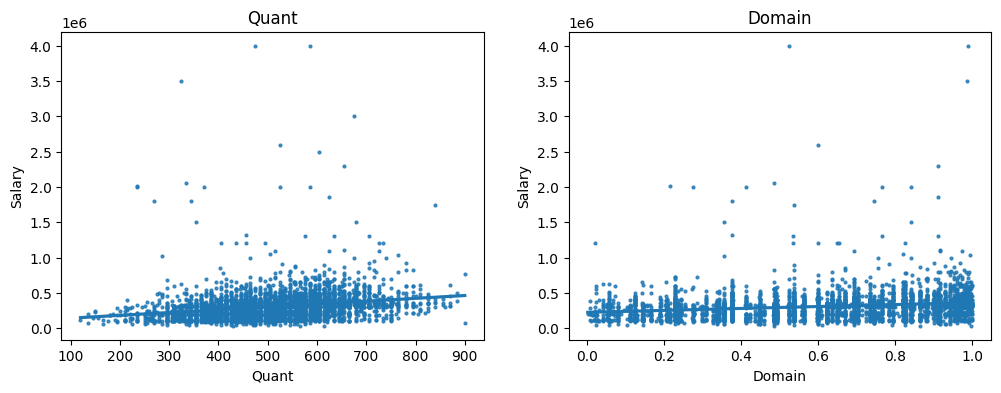

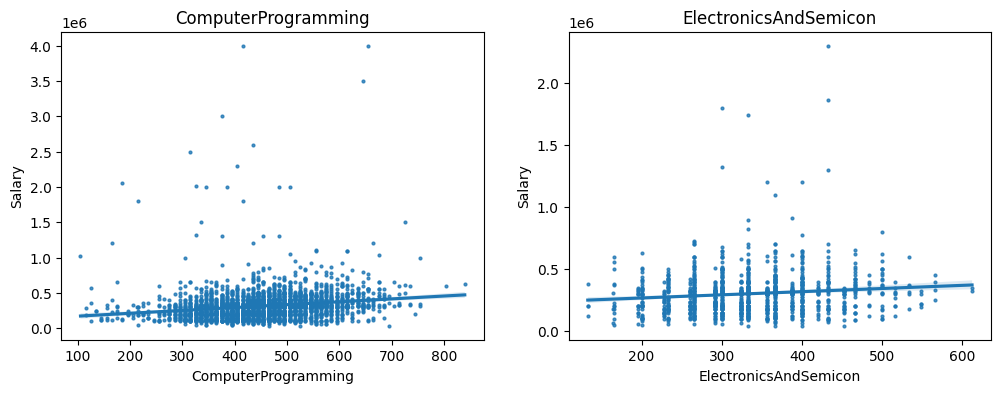

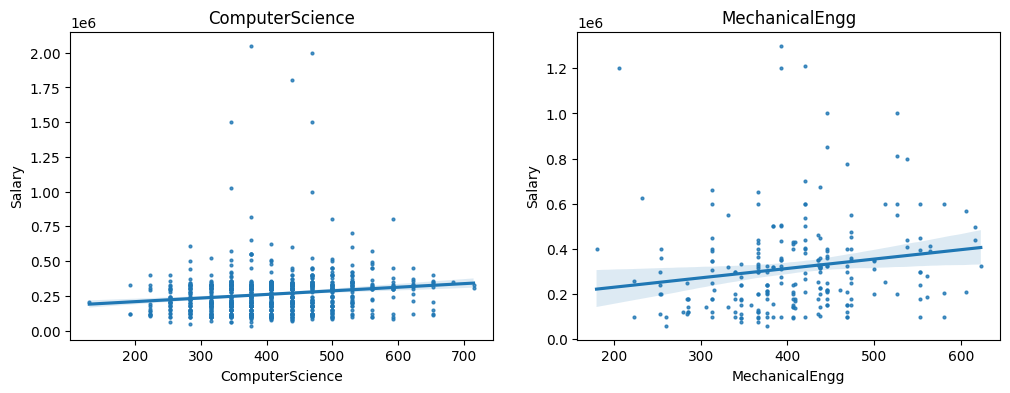

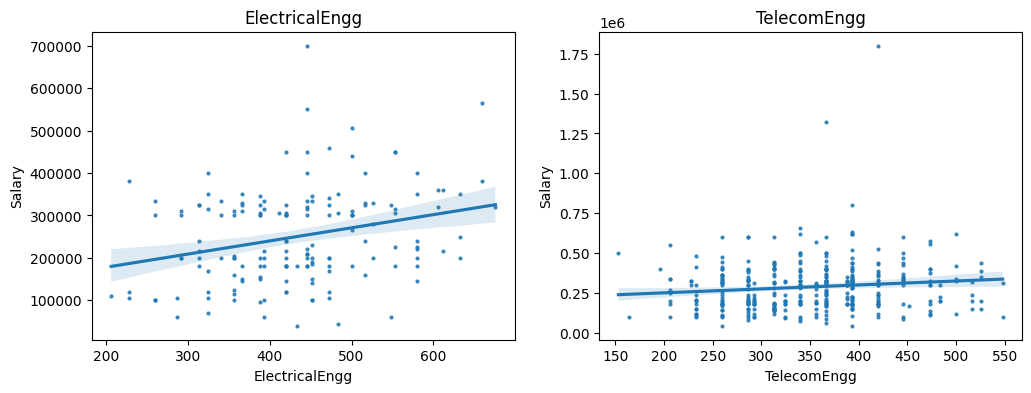

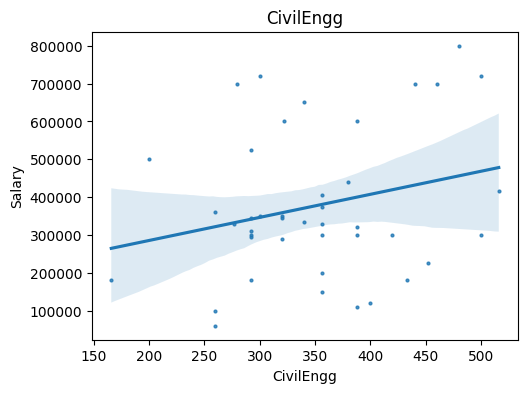

In [75]:
for i in range(len(unstandardized_scores)//2):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  col1 = unstandardized_scores[2*i]
  col2 = unstandardized_scores[2*i+1]
  sns.regplot(x=col1, y='Salary', data=ameo, scatter_kws={'s':4}, ax=ax1)
  sns.regplot(x=col2, y='Salary', data=ameo, scatter_kws={'s':4}, ax=ax2)
  ax1.set_title(col1)
  ax2.set_title(col2)
  plt.show()
plt.figure(figsize=(5.5,4))
sns.regplot(x=unstandardized_scores[-1], y='Salary', data=ameo, scatter_kws={'s':4})
plt.title(unstandardized_scores[-1])
plt.show()

### "Salary" vs time at the company

<IPython.core.display.Javascript object>

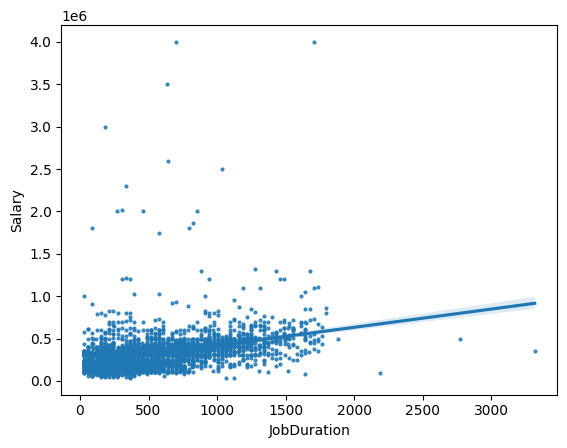

In [76]:
sns.regplot(x='JobDuration', y='Salary', data=ameo, scatter_kws={'s':4})
plt.show()

## "Salary" vs categorical features

### "Salary" vs "CollegeTier"

<IPython.core.display.Javascript object>

Normal-scaled salary


,count,mean,std,min,25%,50%,75%,max
CollegeTier,,,,,,,,
1,297.0,442356.9,312169.3,100000.0,315000.0,360000.0,500000.0,4000000.0
2,3701.0,296893.8,198800.8,35000.0,180000.0,300000.0,360000.0,4000000.0


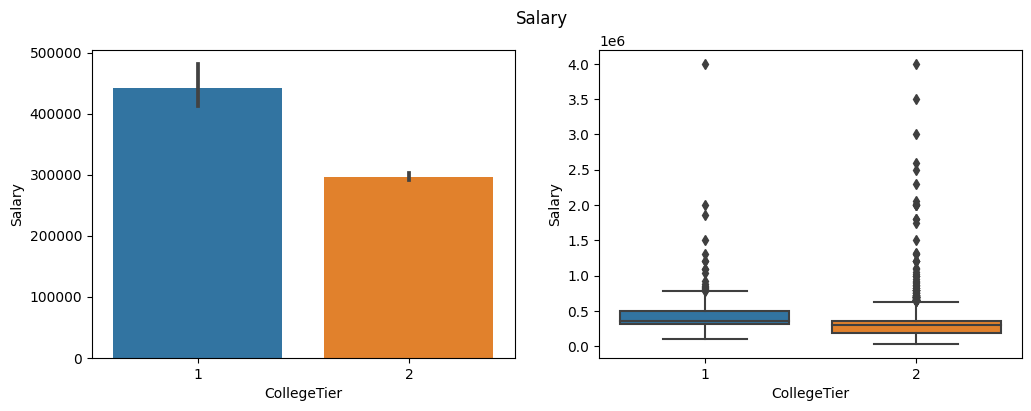


************************************************************

Log-scaled salary


,count,mean,std,min,25%,50%,75%,max
CollegeTier,,,,,,,,
1,297.0,12.872,0.472,11.513,12.660,12.794,13.122,15.202
2,3701.0,12.456,0.537,10.463,12.101,12.612,12.794,15.202


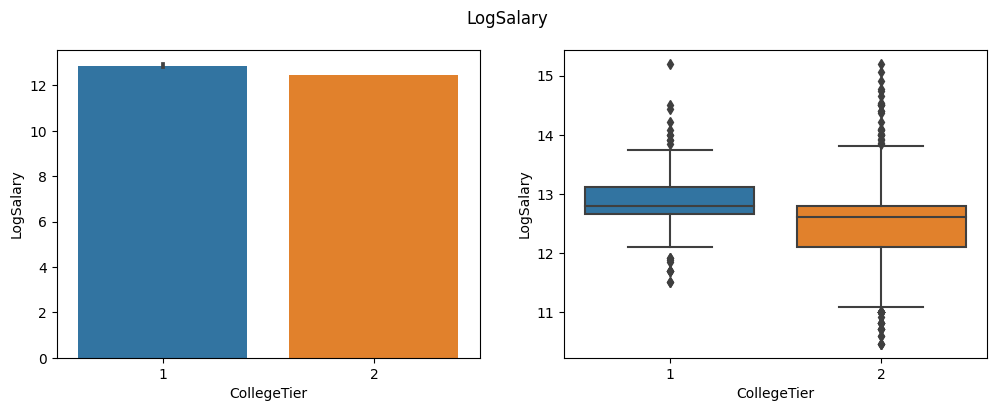

In [77]:
print('Normal-scaled salary')
display(ameo.groupby('CollegeTier')['Salary'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CollegeTier', y='Salary', data=ameo, ax=ax1)
sns.boxplot(x='CollegeTier', y='Salary', data=ameo, ax=ax2)
plt.suptitle('Salary')
plt.show()
print('\n', '*'*60, '\n', sep='')
print('Log-scaled salary')
new_df = ameo[['CollegeTier']]
new_df['LogSalary'] = np.log(ameo['Salary'])
display(new_df.groupby('CollegeTier')['LogSalary'].describe().round(3))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='CollegeTier', y='LogSalary', data=new_df, ax=ax1)
sns.boxplot(x='CollegeTier', y='LogSalary', data=new_df, ax=ax2)
plt.suptitle('LogSalary')
plt.show()

Graduates of Tier 1 colleges earn more than graduates of Tier 2 colleges.

### "Salary" vs "Specialty"

<IPython.core.display.Javascript object>

Normal-scaled salary


,count,mean,std,min,25%,50%,75%,max
Specialty,,,,,,,,
Other,19.0,256842.1,142294.8,40000.0,137500.0,240000.0,355000.0,600000.0
Computer Science,935.0,300625.7,217044.6,35000.0,180000.0,300000.0,380000.0,4000000.0
Computer Engineering,2964.0,309470.0,212548.7,35000.0,195000.0,300000.0,365000.0,4000000.0
Industrial Engineering,80.0,336875.0,177780.6,100000.0,195000.0,320000.0,400000.0,800000.0


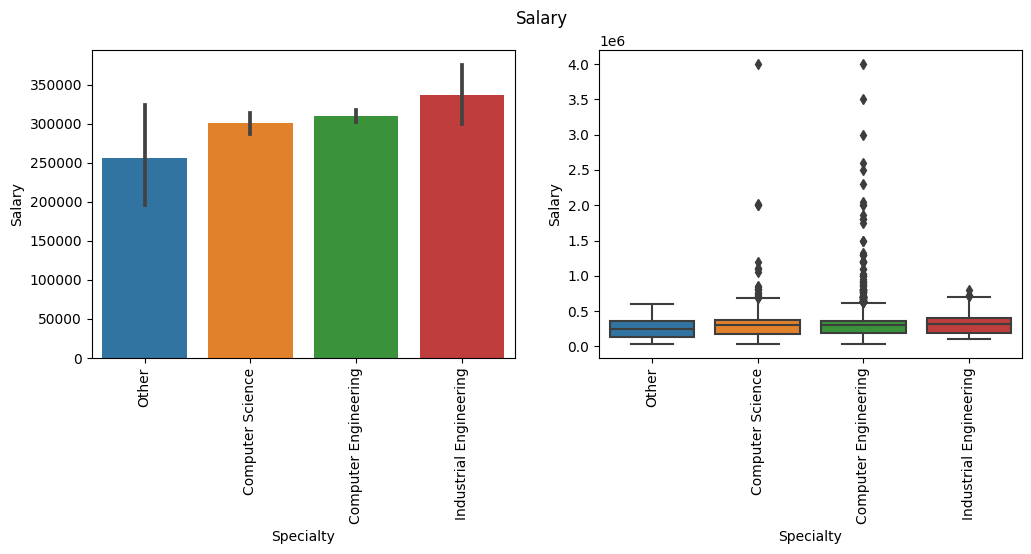


************************************************************

Log-scaled salary


,count,mean,std,min,25%,50%,75%,max
Specialty,,,,,,,,
Other,19.0,12.281,0.659,10.597,11.830,12.388,12.780,13.305
Computer Science,935.0,12.454,0.561,10.463,12.101,12.612,12.848,15.202
Computer Engineering,2964.0,12.496,0.537,10.463,12.181,12.612,12.808,15.202
Industrial Engineering,80.0,12.585,0.552,11.513,12.180,12.676,12.899,13.592


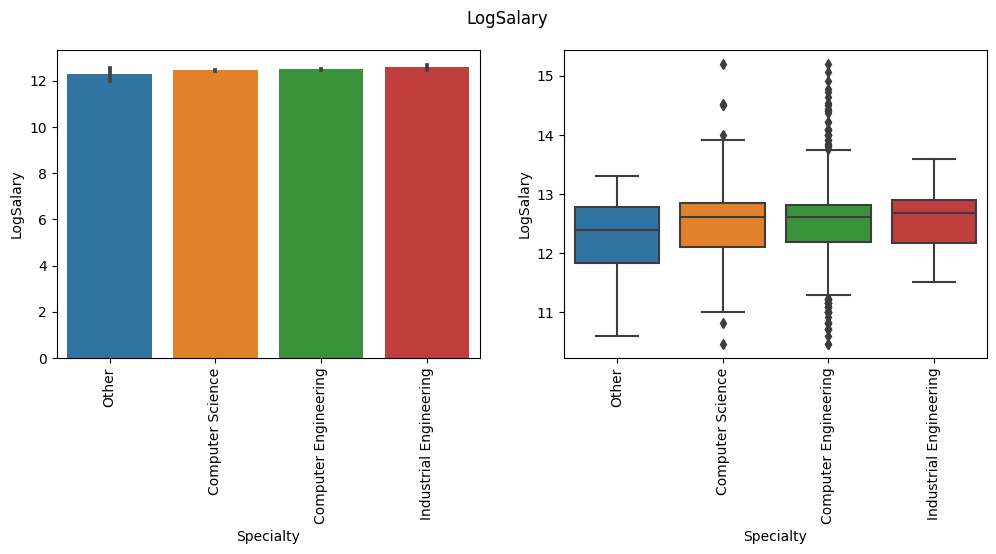

In [78]:
order = ameo.groupby('Specialty')['Salary'].mean().sort_values().index
print('Normal-scaled salary')
display(ameo.groupby('Specialty')['Salary'].describe().round(1).sort_values('mean'))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Specialty', y='Salary', data=ameo, order=order, ax=ax1)
sns.boxplot(x='Specialty', y='Salary', data=ameo, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.suptitle('Salary')
plt.show()
print('\n', '*'*60, '\n', sep='')
print('Log-scaled salary')
new_df = ameo[['Specialty']]
new_df['LogSalary'] = np.log(ameo['Salary'])
display(new_df.groupby('Specialty')['LogSalary'].describe().round(3).sort_values('mean'))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Specialty', y='LogSalary', data=new_df, order=order, ax=ax1)
sns.boxplot(x='Specialty', y='LogSalary', data=new_df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.suptitle('LogSalary')
plt.show()

Graduates of Industrial Engineering earn the highest salaries. However, the differences across groups are minor.

### "Salary" vs "Degree"

<IPython.core.display.Javascript object>

Normal-scaled salary


,count,mean,std,min,25%,50%,75%,max
Degree,,,,,,,,
Bachelor,3700.0,308622.7,203358.2,35000.0,190000.0,300000.0,370000.0,4000000.0
Master,298.0,296241.6,306387.9,40000.0,150000.0,230000.0,360000.0,4000000.0


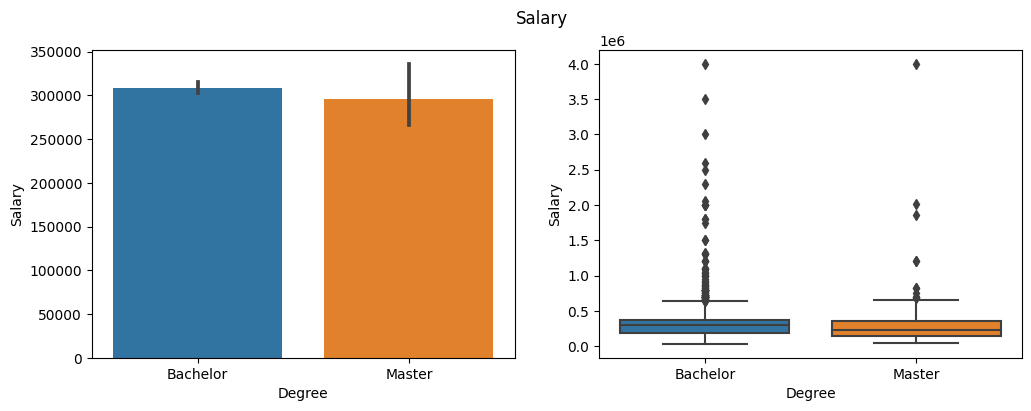


************************************************************

Log-scaled salary


,count,mean,std,min,25%,50%,75%,max
Degree,,,,,,,,
Bachelor,3700.0,12.496,0.534,10.463,12.155,12.612,12.821,15.202
Master,298.0,12.365,0.639,10.597,11.918,12.346,12.794,15.202


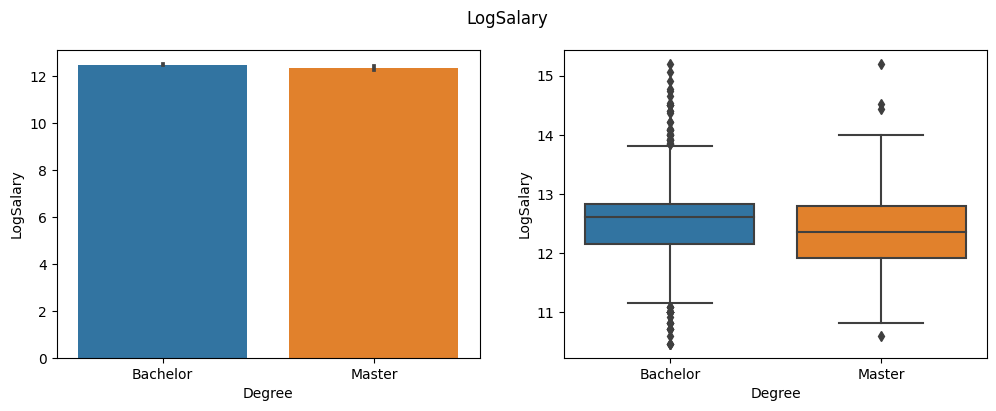

In [79]:
print('Normal-scaled salary')
display(ameo.groupby('Degree')['Salary'].describe().round(1))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Degree', y='Salary', data=ameo, ax=ax1)
sns.boxplot(x='Degree', y='Salary', data=ameo, ax=ax2)
plt.suptitle('Salary')
plt.show()
print('\n', '*'*60, '\n', sep='')
print('Log-scaled salary')
new_df = ameo[['Degree']]
new_df['LogSalary'] = np.log(ameo['Salary'])
display(new_df.groupby('Degree')['LogSalary'].describe().round(3))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
sns.barplot(x='Degree', y='LogSalary', data=new_df, ax=ax1)
sns.boxplot(x='Degree', y='LogSalary', data=new_df, ax=ax2)
plt.suptitle('LogSalary')
plt.show()

Bachelor's degree holders earn slightly more than master's degree holders. However, the groups are severely uneven, and the difference can be insignificant.

### "Salary" vs "Job"

<IPython.core.display.Javascript object>

Normal-scaled salary


,count,mean,std,min,25%,50%,75%,max
Job,,,,,,,,
Administrator,201.0,228059.7,120363.9,60000.0,150000.0,200000.0,255000.0,910000.0
Other,386.0,252124.4,235961.2,40000.0,145000.0,200000.0,280000.0,2000000.0
Developer,753.0,267994.7,221494.3,35000.0,135000.0,240000.0,340000.0,3000000.0
Hardware Engineer,466.0,291083.7,172999.6,50000.0,180000.0,265000.0,355000.0,1860000.0
Analyst,411.0,317335.8,158333.6,50000.0,205000.0,305000.0,360000.0,2020000.0
Test Engineer,182.0,327412.1,313781.5,60000.0,180000.0,305000.0,400000.0,4000000.0
Software Engineer,962.0,344906.4,223241.9,50000.0,240000.0,315000.0,400000.0,4000000.0
System Engineer,477.0,355167.7,176861.3,35000.0,315000.0,330000.0,415000.0,3500000.0
Manager,160.0,364687.5,225009.2,50000.0,210000.0,312500.0,442500.0,1320000.0


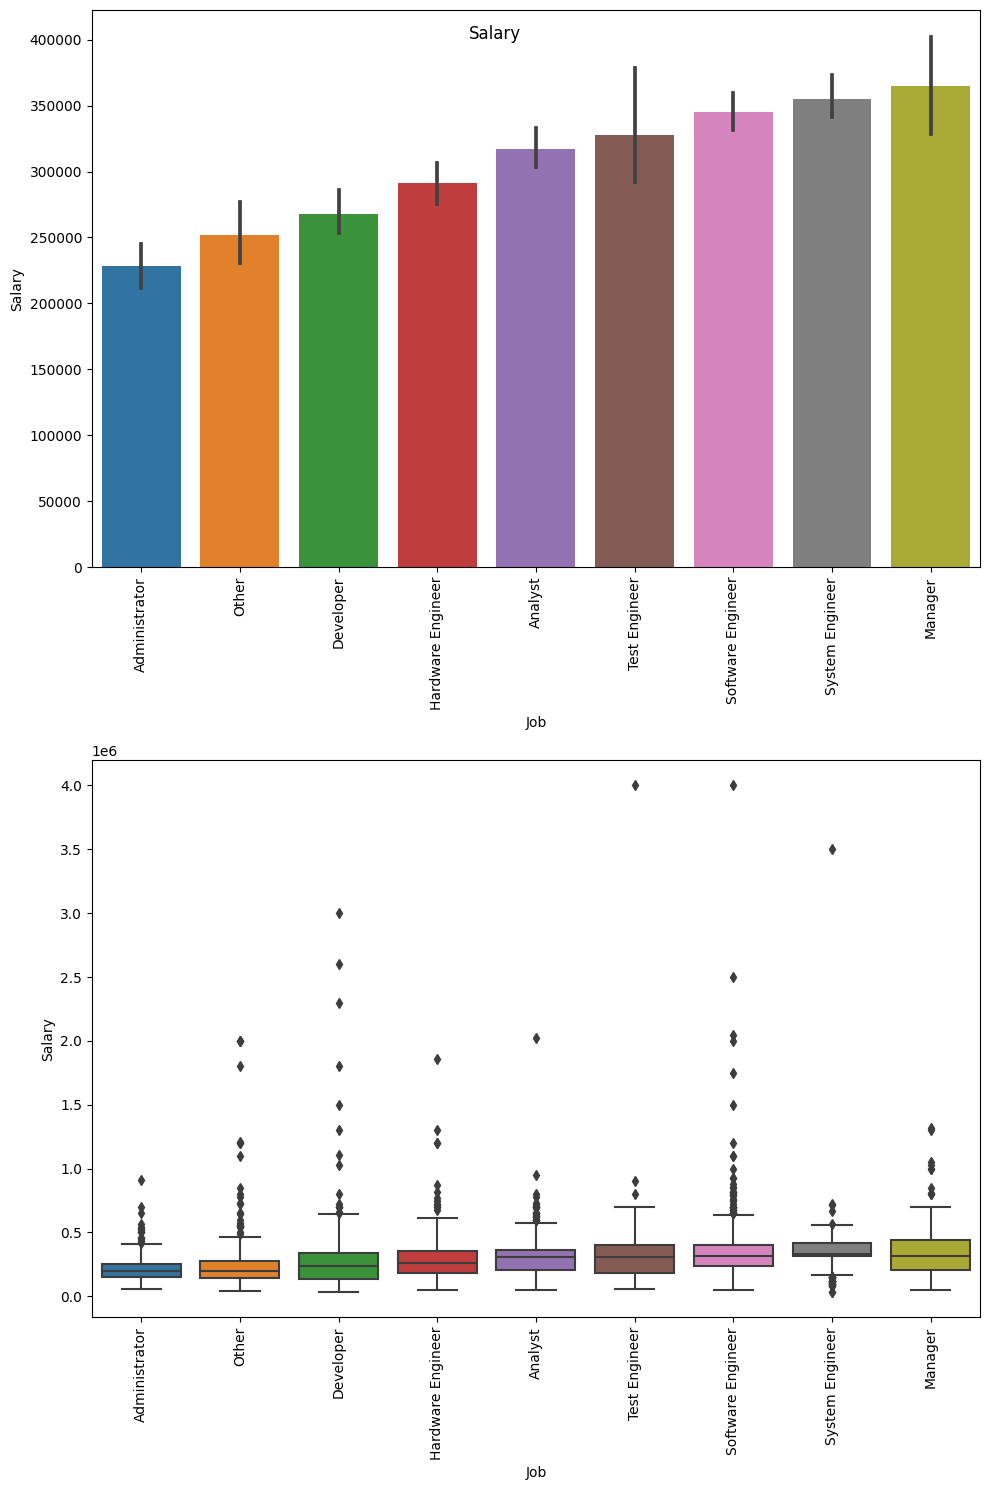


************************************************************

Log-scaled salary


,count,mean,std,min,25%,50%,75%,max
Job,,,,,,,,
Other,386.0,12.229,0.589,10.597,11.884,12.206,12.543,14.509
Administrator,201.0,12.230,0.449,11.002,11.918,12.206,12.449,13.721
Developer,753.0,12.308,0.596,10.463,11.813,12.388,12.737,14.914
Hardware Engineer,466.0,12.445,0.517,10.820,12.101,12.487,12.780,14.436
Test Engineer,182.0,12.517,0.572,11.002,12.101,12.628,12.899,15.202
Analyst,411.0,12.568,0.451,10.820,12.231,12.628,12.794,14.519
Software Engineer,962.0,12.627,0.490,10.820,12.388,12.660,12.899,15.202
Manager,160.0,12.638,0.589,10.820,12.255,12.652,13.000,14.093
System Engineer,477.0,12.709,0.393,10.463,12.660,12.707,12.936,15.068


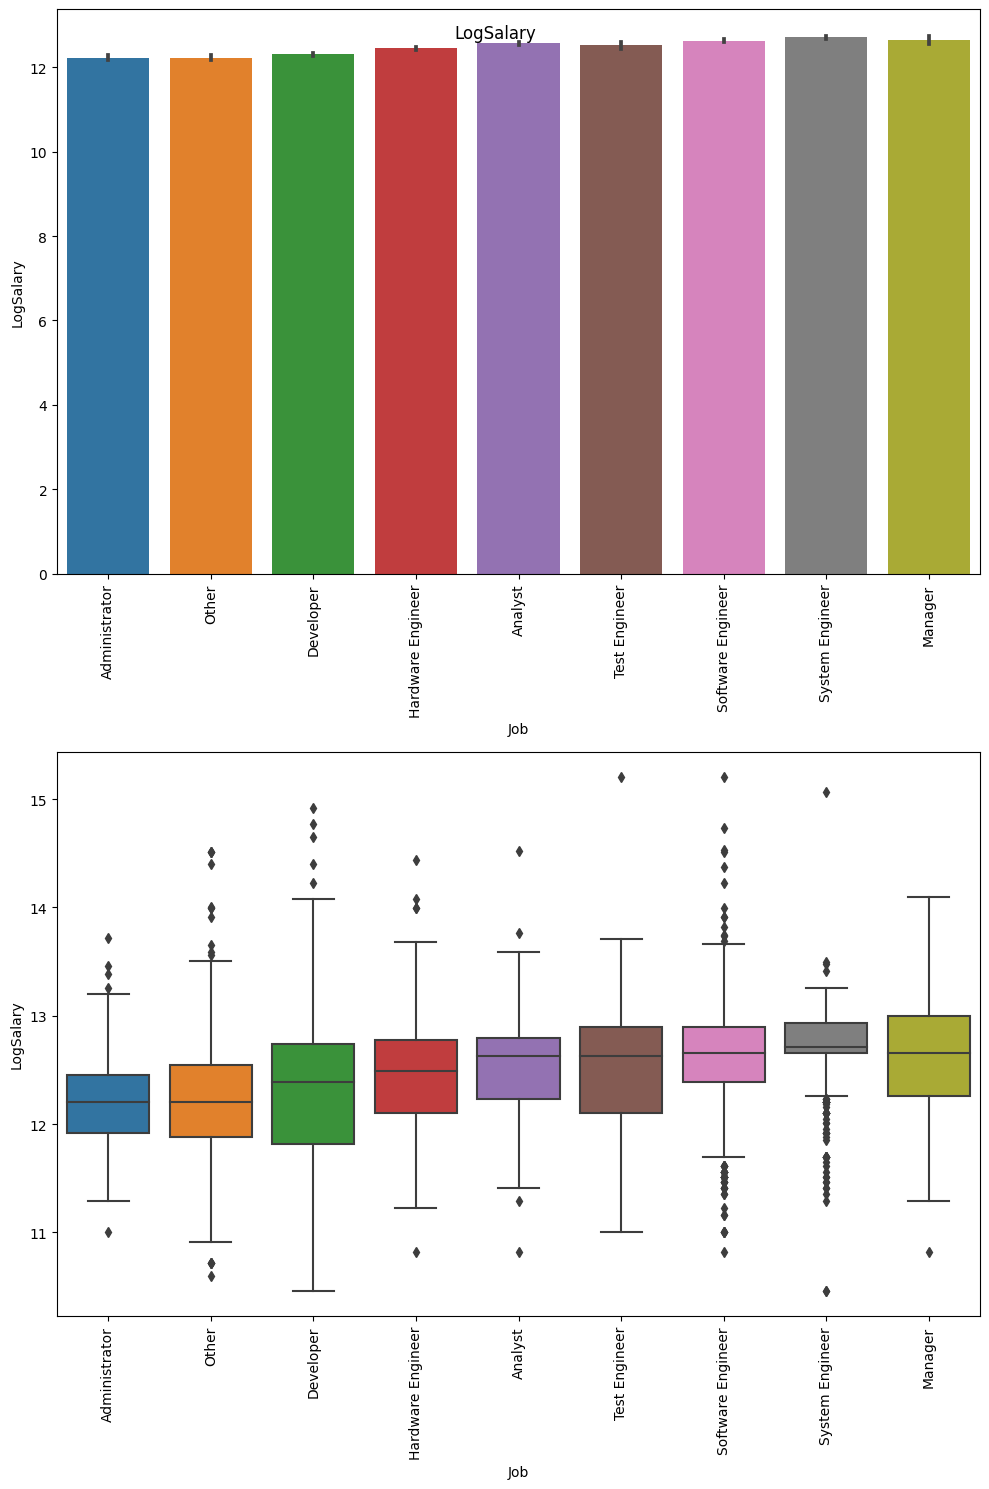

In [80]:
order = ameo.groupby('Job')['Salary'].mean().sort_values().index
print('Normal-scaled salary')
display(ameo.groupby('Job')['Salary'].describe().round(1).sort_values('mean'))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,15))
sns.barplot(x='Job', y='Salary', data=ameo, order=order, ax=ax1)
sns.boxplot(x='Job', y='Salary', data=ameo, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.tight_layout()
plt.suptitle('Salary')
plt.show()
print('\n', '*'*60, '\n', sep='')
print('Log-scaled salary')
new_df = ameo[['Job']]
new_df['LogSalary'] = np.log(ameo['Salary'])
display(new_df.groupby('Job')['LogSalary'].describe().round(3).sort_values('mean'))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,15))
sns.barplot(x='Job', y='LogSalary', data=new_df, order=order, ax=ax1)
sns.boxplot(x='Job', y='LogSalary', data=new_df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.tight_layout()
plt.suptitle('LogSalary')
plt.show()

Managers and system, software, and test engineers earn the highest salaries.

### "Salary" vs "JobState"

<IPython.core.display.Javascript object>

Normal-scaled salary


,count,mean,std,min,25%,50%,75%,max
JobState,,,,,,,,
Rajasthan,67.0,246417.9,139150.0,100000.0,145000.0,210000.0,300000.0,700000.0
Madhya Pradesh,98.0,261581.6,162170.5,80000.0,132500.0,232500.0,325000.0,1210000.0
Kerala,33.0,263030.3,117313.3,90000.0,180000.0,300000.0,325000.0,560000.0
West Bengal,136.0,267683.8,223497.4,60000.0,137500.0,240000.0,335000.0,2300000.0
Odisha,46.0,269782.6,161709.5,60000.0,120000.0,287500.0,357500.0,680000.0
Delhi,228.0,271228.1,286201.4,70000.0,170000.0,215000.0,306250.0,4000000.0
Uttar Pradesh,516.0,283244.2,199131.4,35000.0,180000.0,240000.0,340000.0,2050000.0
Tamil Nadu,349.0,287507.2,131241.1,45000.0,200000.0,300000.0,340000.0,1300000.0
Telangana,375.0,307093.3,162257.1,35000.0,190000.0,300000.0,385000.0,1500000.0


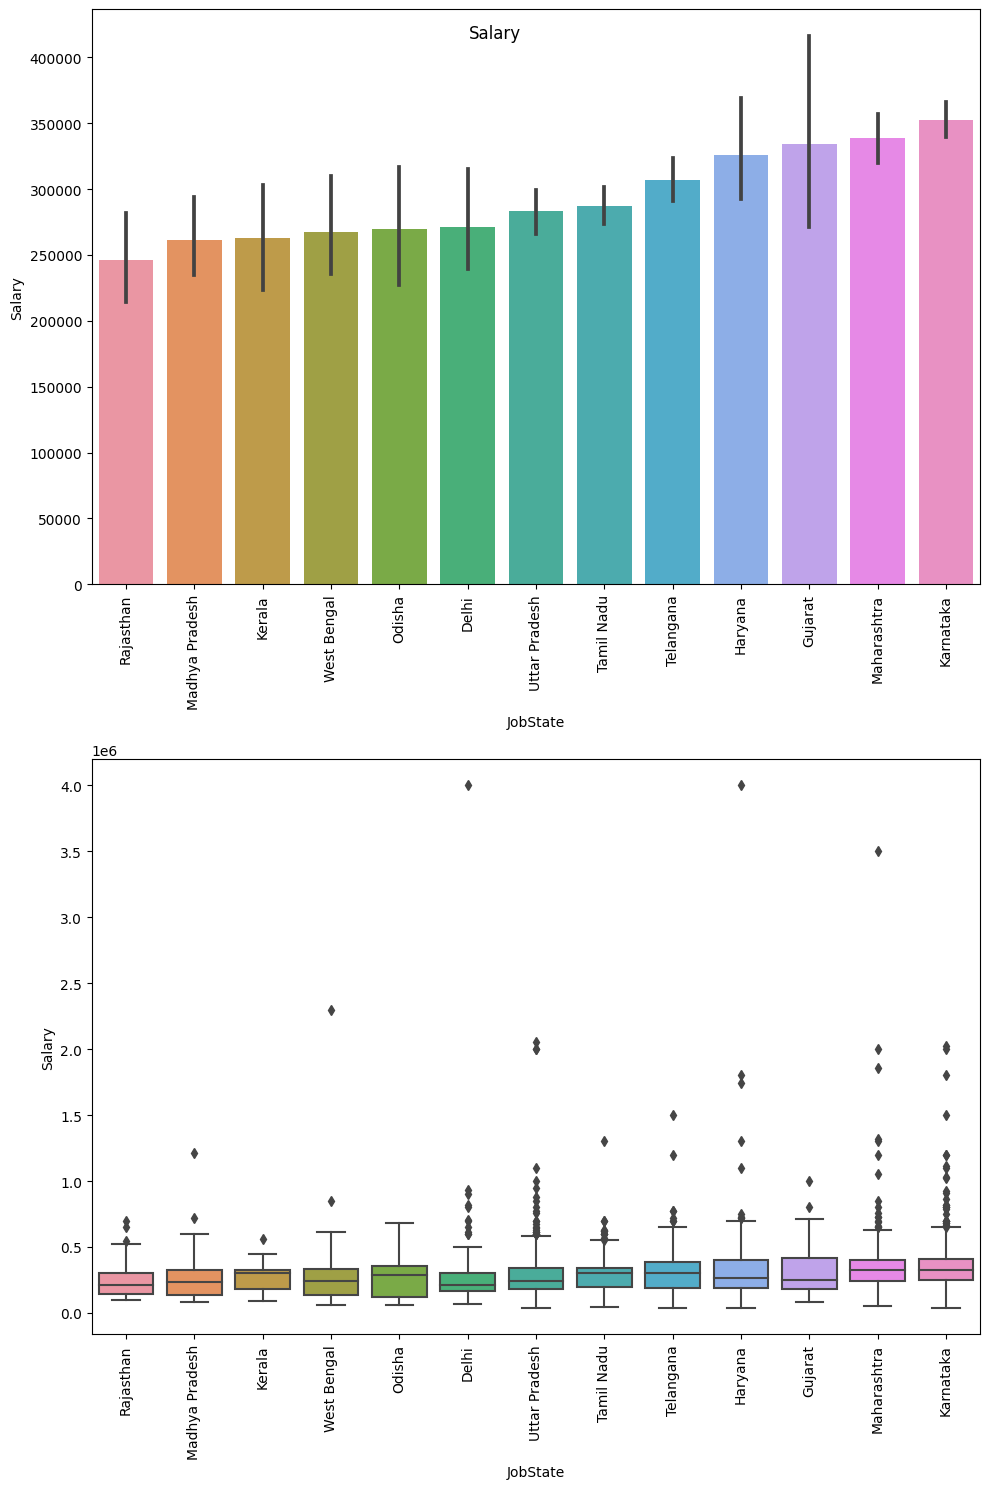


************************************************************

Log-scaled salary


,count,mean,std,min,25%,50%,75%,max
JobState,,,,,,,,
Rajasthan,67.0,12.276,0.522,11.513,11.884,12.255,12.612,13.459
West Bengal,136.0,12.301,0.611,11.002,11.831,12.388,12.722,14.648
Odisha,46.0,12.312,0.654,11.002,11.695,12.568,12.787,13.430
Madhya Pradesh,98.0,12.317,0.561,11.290,11.794,12.356,12.692,14.006
Delhi,228.0,12.336,0.521,11.156,12.044,12.278,12.632,15.202
Kerala,33.0,12.371,0.495,11.408,12.101,12.612,12.692,13.236
Uttar Pradesh,516.0,12.396,0.548,10.463,12.101,12.388,12.737,14.533
Tamil Nadu,349.0,12.463,0.484,10.714,12.206,12.612,12.737,14.078
Haryana,264.0,12.500,0.584,10.463,12.148,12.497,12.899,15.202


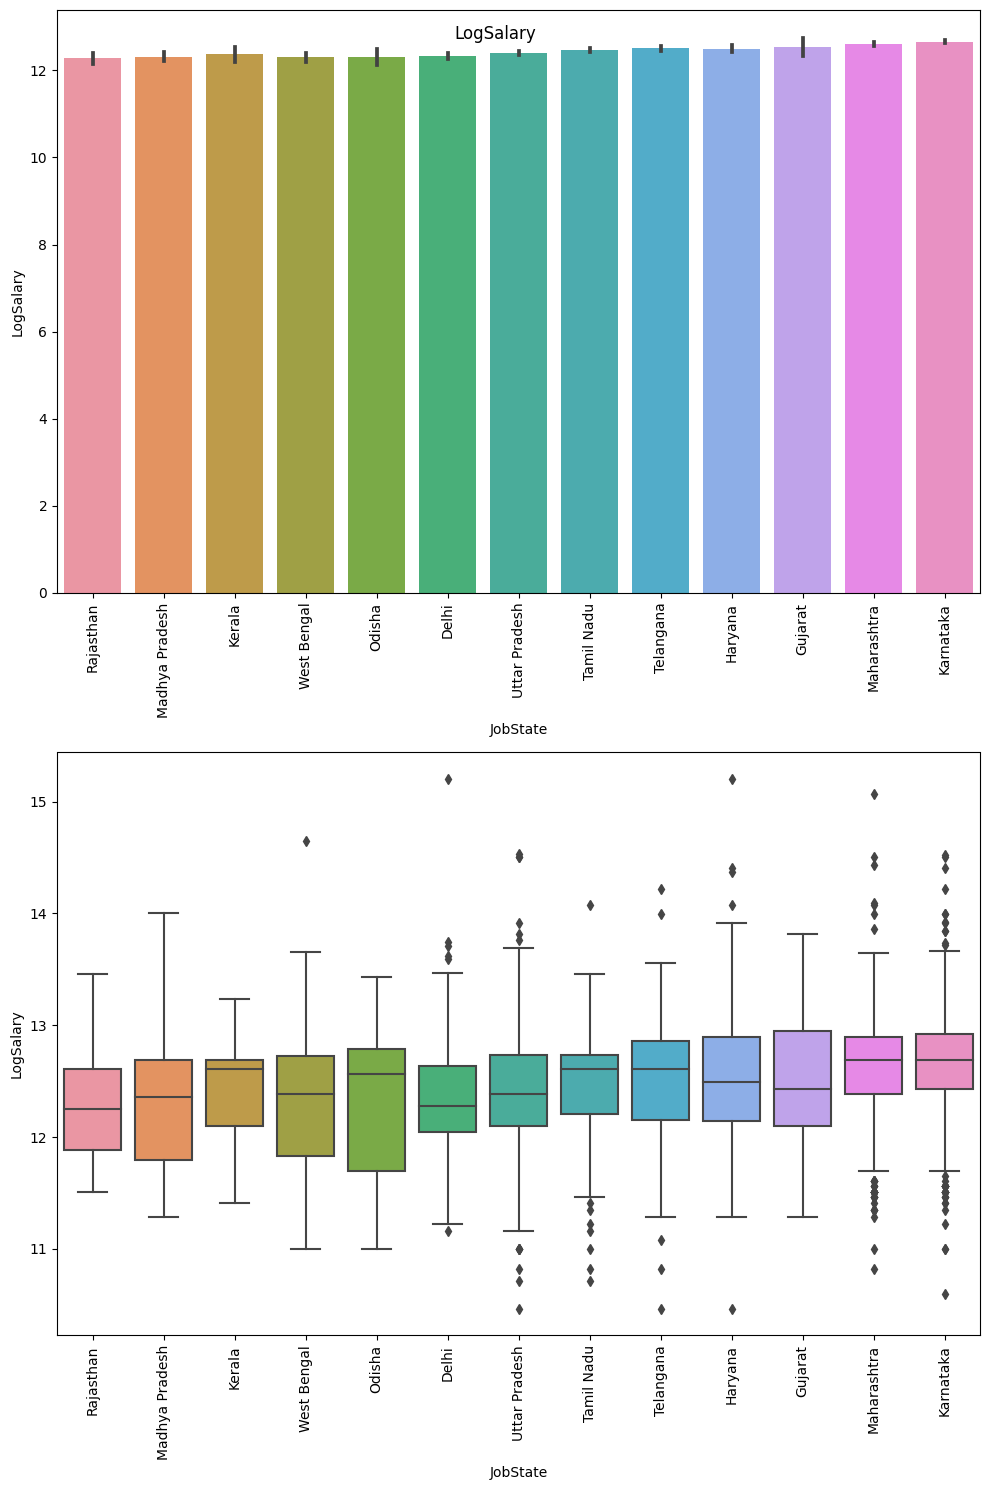

In [81]:
new_df = ameo[ameo['JobState'].map(ameo['JobState'].value_counts()) > 30]
order = new_df.groupby('JobState')['Salary'].mean().sort_values().index
print('Normal-scaled salary')
display(new_df.groupby('JobState')['Salary'].describe().round(1).sort_values('mean'))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,15))
sns.barplot(x='JobState', y='Salary', data=new_df, order=order, ax=ax1)
sns.boxplot(x='JobState', y='Salary', data=new_df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.tight_layout()
plt.suptitle('Salary')
plt.show()
print('\n', '*'*60, '\n', sep='')
print('Log-scaled salary')
new_df['LogSalary'] = np.log(ameo['Salary'])
display(new_df.groupby('JobState')['LogSalary'].describe().round(3).sort_values('mean'))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,15))
sns.barplot(x='JobState', y='LogSalary', data=new_df, order=order, ax=ax1)
sns.boxplot(x='JobState', y='LogSalary', data=new_df, order=order, ax=ax2)
ax1.tick_params('x', labelrotation=90)
ax2.tick_params('x', labelrotation=90)
plt.tight_layout()
plt.suptitle('LogSalary')
plt.show()

The states with the highest salaries are Karnataka, Maharashtra, and Gujarat.


# Research Questions

## Relationship between Job roles and Salary

- Times of India article dated Jan 18, 2019 states that “After doing your Computer Science
Engineering if you take up jobs as a Programming Analyst, Software Engineer,
Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh
graduate.” Test this claim with the data given to you.

In [82]:
ameo['Job'].unique()

<IPython.core.display.Javascript object>

array(['Test Engineer', 'Manager', 'System Engineer', 'Software Engineer',
       'Other', 'Hardware Engineer', 'Developer', 'Analyst',
       'Administrator'], dtype=object)

In [83]:
jobs_df = ameo[ameo['Job'].isin(['System Engineer', 'Software Engineer', 'Hardware Engineer', 'Analyst'])]
jobs_df['Salary'].describe().round(1)

<IPython.core.display.Javascript object>

count       2316.0
mean      331297.5
std       195258.7
min        35000.0
25%       225000.0
50%       320000.0
75%       400000.0
max      4000000.0
Name: Salary, dtype: float64

In [84]:
from scipy.stats import zscore
jobs_df = jobs_df[zscore(jobs_df['Salary']) < 3]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

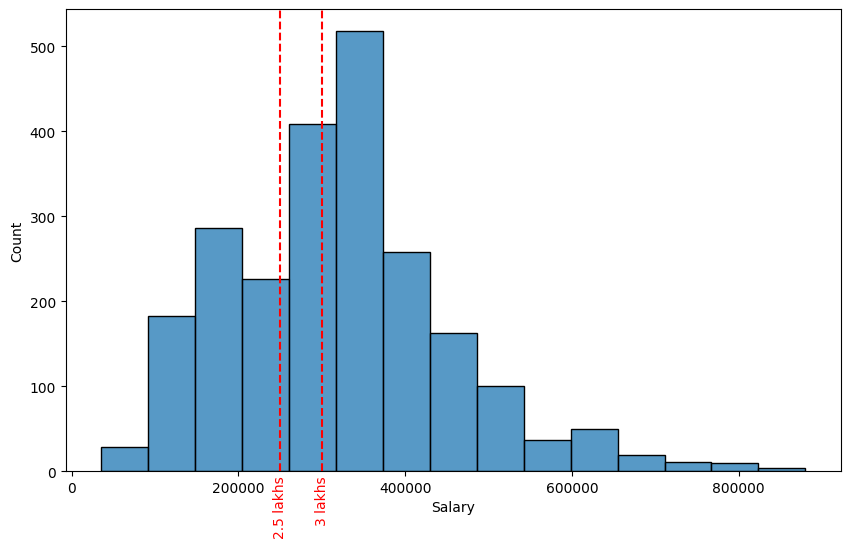

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(jobs_df['Salary'], bins=15)
ax.axvline(250000, ls='--', color='r')
ax.axvline(300000, ls='--', color='r')
ax.text(250000, -5, "2.5 lakhs", fontsize=10, c='red', va='top', ha='center', rotation=90)
ax.text(300000, -5, "3 lakhs", fontsize=10, c='red', va='top', ha='center', rotation=90)
plt.show()

The majority of graduates earn even more than 2.5 to 3 lakhs per year, according to the salary distribution. Therefore, the claim is not supported by the data.

## Relathonship between gender and specialization

- Is there a relationship between gender and specialization? (i.e. Does the preference of Specialization depend on the Gender?)

In [86]:
pd.crosstab(index=ameo['Gender'], columns=ameo['Specialty'])

<IPython.core.display.Javascript object>

Specialty,Computer Engineering,Computer Science,Industrial Engineering,Other
Gender,,,,
f,693,241,22,1
m,2271,694,58,18


To determine whether men and women have different preferences for specializations, the chi-square test can be used.
All of the observed frequencies must be at least 5 in order to apply this test. Therefore, the "Other" specialty should be removed.

The test's significance level will be set at 0.05.

In [87]:
from scipy.stats import chi2_contingency

gen_spec_df = ameo[ameo['Specialty'] != 'Other']
cont_tab = pd.crosstab(index=gen_spec_df['Gender'], columns=gen_spec_df['Specialty'])
chi2 = chi2_contingency(cont_tab, correction=False)
print("statistic:", chi2.statistic)
print("p-value:", chi2.pvalue)

<IPython.core.display.Javascript object>

statistic: 2.7730043106374227
p-value: 0.24994805684722468


The p-value of the statistic exceeds the significance level, which means that the variables are independent. Therefore, there is no relationship between gender and specialization.

## Bonus question
- Is there a relationship between gender and salary?

In [88]:
ameo.groupby('Gender')['Salary'].describe()

<IPython.core.display.Javascript object>

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
f,957.0,294937.304075,191031.789503,35000.0,200000.0,300000.0,355000.0,3500000.0
m,3041.0,311716.211772,218999.537438,35000.0,180000.0,300000.0,380000.0,4000000.0


At first glance, it would appear that men and women earn the same amount of money.

Given that the salary variable is not normally distributed, a non-parametric test should be used to check the hypothesis that men and women earn equal amounts of money.

The test's significance level will be set at 0.05.

In [89]:
from scipy.stats import mannwhitneyu

fem_sal = ameo[ameo['Gender'] == 'f']['Salary']
mal_sal = ameo[ameo['Gender'] == 'm']['Salary']

u_stat, p_value = mannwhitneyu(fem_sal, mal_sal, alternative='less')
print("U-statistic:", u_stat)
print("p-value:", p_value)

<IPython.core.display.Javascript object>

U-statistic: 1400518.5
p-value: 0.03969567110195918


Surprisingly, there is a significant difference between men's and women's incomes. Women earn slightly less than men.

# Conclusions

- The average graduation age for high school and college graduates is 17.7 and 22.2 years, respectively.

- Higher school grades increase the likelihood of graduates being accepted into Tier 1 institutions.

- Females tend to perform better than males in the 10th and 12th grades, as well as in college with higher GPAs.

- Graduates are mostly employed as software engineers and developers, with an average salary of 307699.8 INR.

- Age, academic performance, and AMCAT scores all have a weakly positive correlation with salary. Salary and time at the company have the strongest correlation.

- Graduates from Tier 1 colleges make more money than those from Tier 2 colleges, with salaries being higher in Gujarat, Maharashtra, and Karnataka.

- The majority of freshly graduates earn more than 3 lakhs per year which is inconsistent with the assertion in the Indian Times article.

- Statistics show no association between gender and specialization.

- According to this study, women make slightly less money than men.